# Regression Project

In [ ]:
In this project we will use regression models to determine how features affect house price.  

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [445]:
df = pd.read_csv('kc_house_data.csv') 

In [446]:
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

# Data Mining

View how many rows and columns in dataframe.

In [10]:
df.shape

(21597, 21)

In [447]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


View unique values from each column.

In [11]:
for column in df:
    print(column,df[column].unique())

id [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
date ['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/2014' '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014'
 '3/16/2015' '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014'
 '12/22/2014' '1/28/2015' '6/2/2014' '11/14/201

Sum null values in columns.

In [449]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Cleaning

Turn NaN values into median of respective column.  


In [356]:
df=df.mask(df=='NaN').fillna(df.median())
df

C:\Users\Student\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         0.0   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         0.0   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           0.0    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

There is and iregular data type, "?", in the data.  We will find and replace it with the mode.  

Find the column with "?".

In [241]:
list1=[]
for column in df.columns:
    for i in df[(f'{column}')]:
        if i == '?':
            list1.append(column)

            mode = df[(f'{column}')].mode()


print(f'Columns:{set(list1)}')
print(f'Value:{mode}')

Columns:{'sqft_basement'}
Value:0    0.0
dtype: object


Replace "?" with mode.

In [357]:
sqft_basement1=[]

for i in df[('sqft_basement')]:
    if i != '?':
        sqft_basement1.append(i)
    elif i == '?':
            i=i.replace('?', '0')
            sqft_basement1.append(i)
sqft_basement1=pd.DataFrame(sqft_basement1)
sqft_basement1

0
0        0.0
1      400.0
2        0.0
3      910.0
4        0.0
...      ...
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0

[21597 rows x 1 columns]

In [358]:
df.reset_index(drop=True, inplace=True)
sqft_basement1.reset_index(drop=True, inplace=True)

In [359]:
df=pd.concat([df,sqft_basement1],axis=1)

In [360]:
df=df.drop(['sqft_basement'], axis=1)

In [361]:
df=df.rename(columns={0: 'sqft_basement'})

In [362]:
df=df.drop(['id'], axis=1)

# Data Explotraion

In [26]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

The regression assumtions are: Liniarity, which is that the relationship between X and Y is linear; Independence, which is that observations are not colinear; Homoscedasticity, which is that the residuals are the same for any value of X; and Normality, which is that Y is normally distributed for all fixed values of X.

Check the liniarity assumtion.  

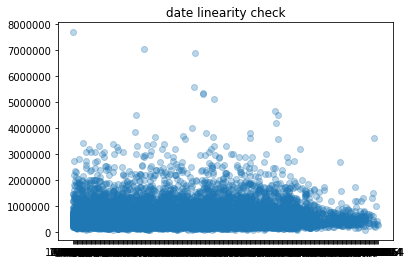

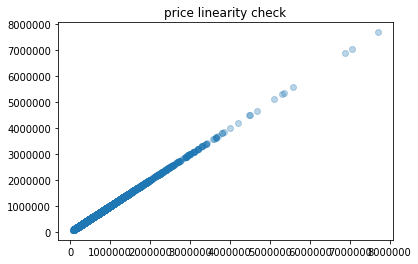

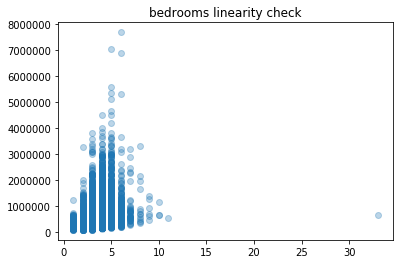

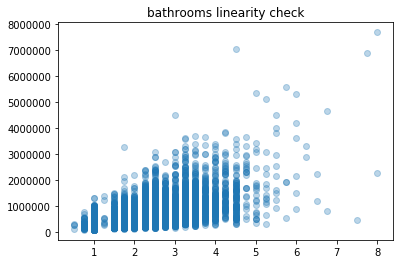

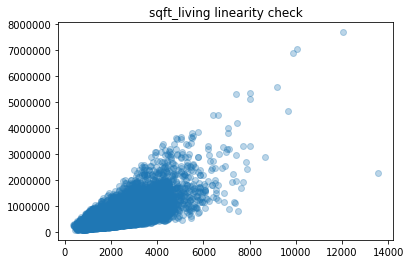

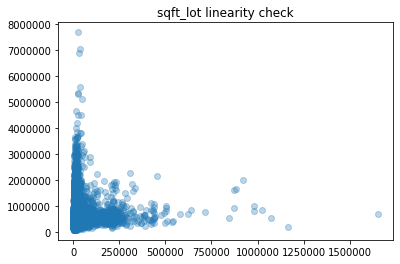

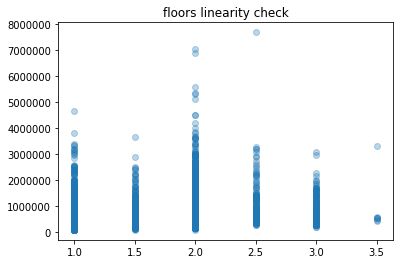

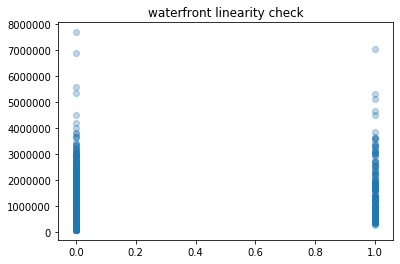

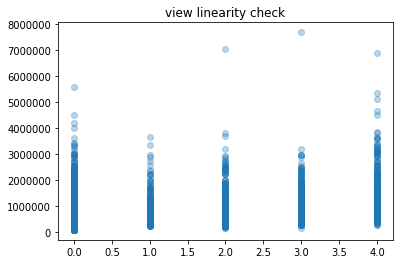

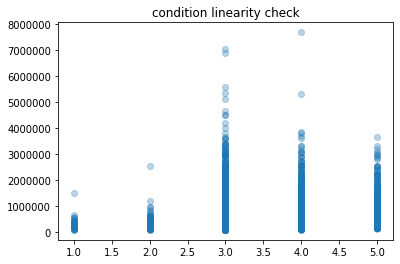

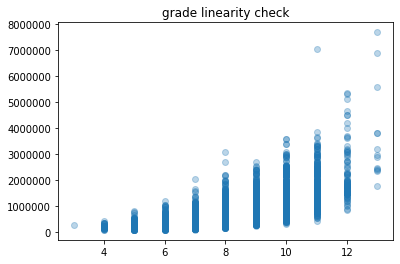

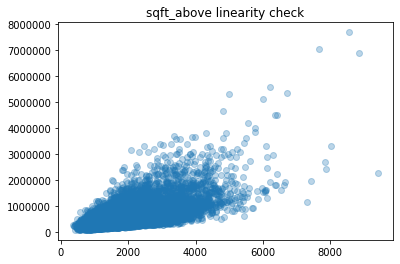

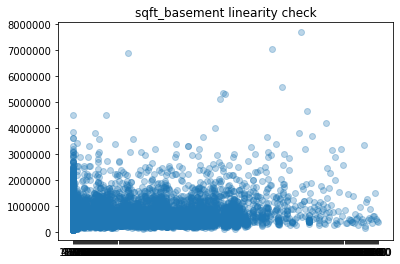

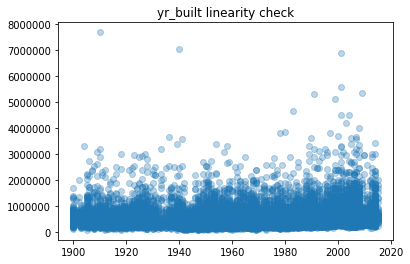

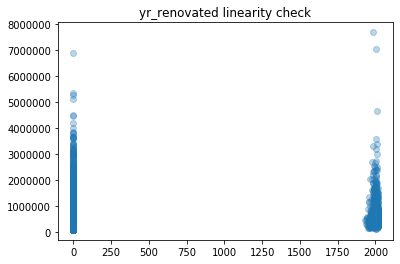

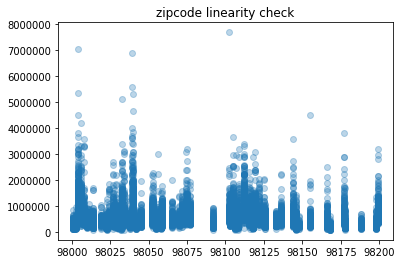

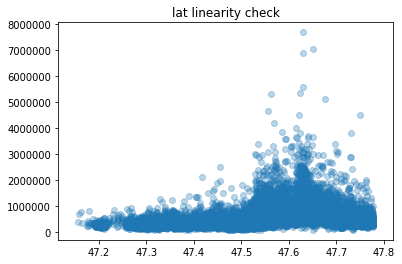

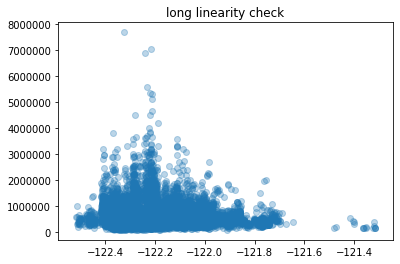

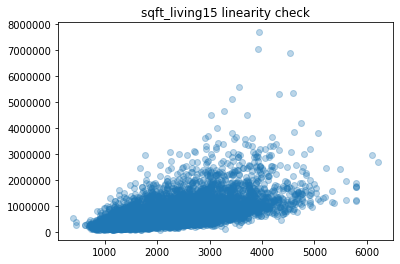

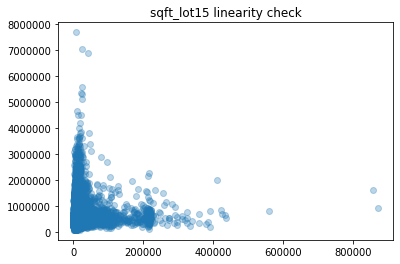

In [25]:
for (columnName, columnData) in df.iteritems():
    dataY=data[('price')].astype(int)
    plt.scatter(columnData, dataY, alpha=.3)
    plt.title(f"{columnName} linearity check")
    plt.show()

The features are all linear or categorical exept for the date feature, we'll encode date in feature engineering.  

Check the independence assumtion.  If features are colinear, we will remove one of them.


In [33]:
abs(data.corr())> 0.70

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False         True     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living     True     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
yr_built       False     False      False        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False      True   False   

               waterfront   view  condition  grade  sqft_above  yr_built  \
price               False  False      False  False       False     False   
bedrooms            False  False      False  False       False     False   
bathrooms           False  False      False  False       False     False   
sqft_living         False  False      False   True        True     False   
sqft_lot            False  False      False  False       False     False   
floors              False  False      False  False       False     False   
waterfront           True  False      False  False       False     False   
view                False   True      False  False       False     False   
condition           False  False       True  False       False     False   
grade               False  False      False   True        True     False   
sqft_above          False  False      False   True        True     False   
yr_built            False  False      False  False       False      True   
yr_renovated        False  False      False  False       False     False   
zipcode             False  False      False  False       False     False   
lat                 False  False      False  False       False     False   
long                False  False      False  False       False     False   
sqft_living15       False  False      False   True        True     False   
sqft_lot15          False  False      False  False       False     False   

               yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  
price                 False    False  False  False          False       False  
bedrooms              False    False  False  False          False       False  
bathrooms             False    False  False  False          False       False  
sqft_living           False    False  False  False           True       False  
sqft_lot              False    False  False  False          False        True  
floors                False    False  False  False          False       False  
waterfront            False    False  False  False          False       False  
view                  False    False  False  False          False       False  
condition             False    False  False  False          False       False  
grade                 False    False  False  False           True       False  
sqft_above            False    False  False  False           True       False  
yr_built              False    False  False  False          False       False  
yr_renovated           True    False  False  False          False       False  
zipco

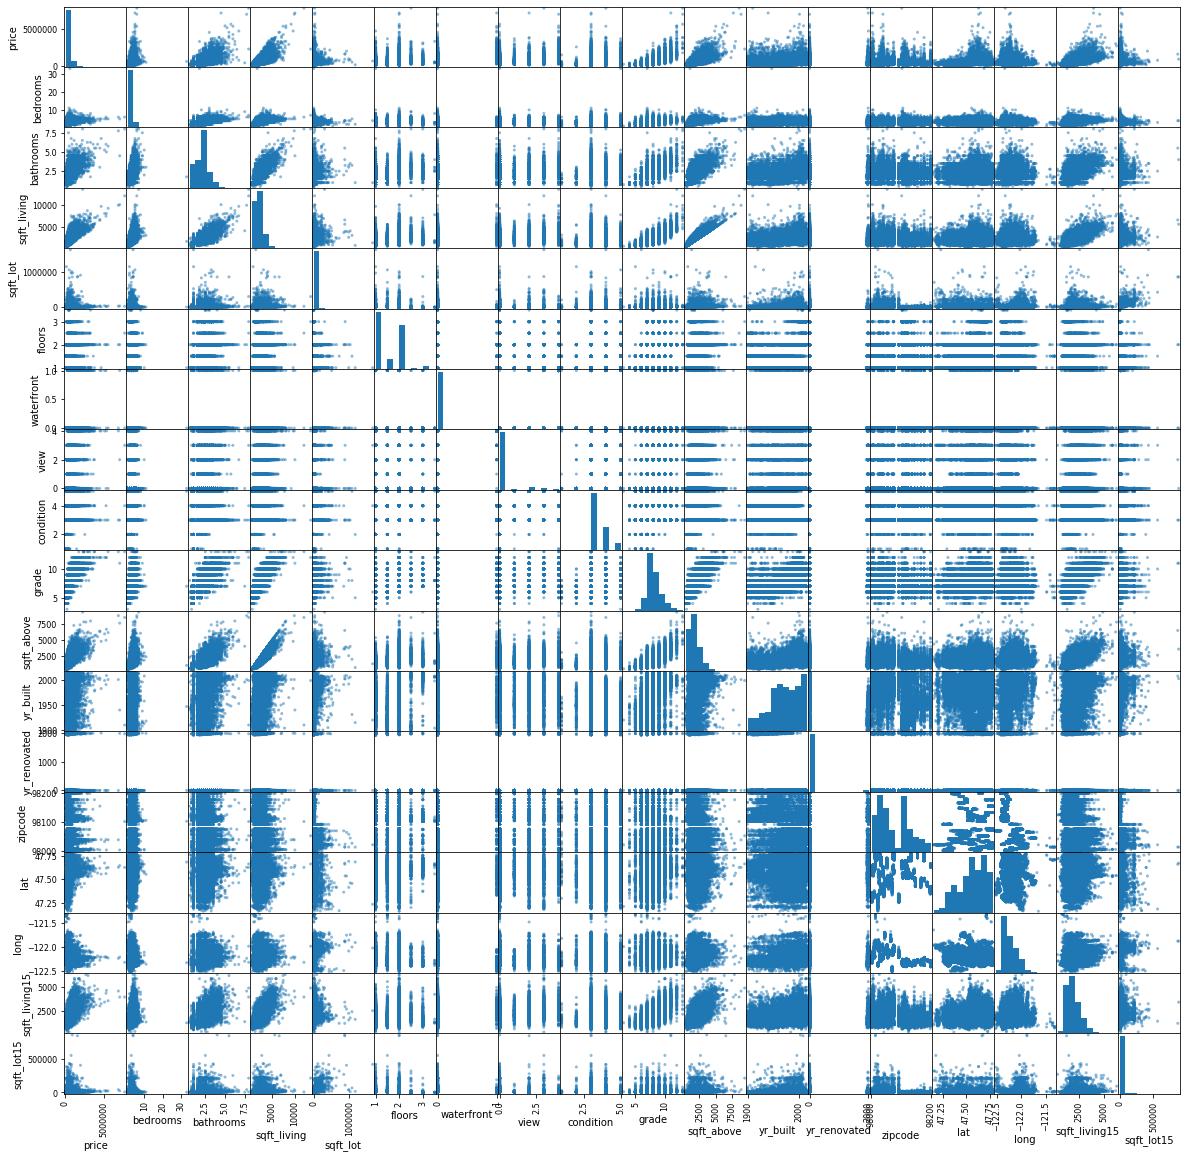

In [34]:
pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
plt.show()

Both sqft_living15 and sqft_lot15 are colinear with sqft_living and sqft_lot, respectively.  We will drop sqft_living15 and sqft_lot15 features.  

In [363]:
df=df.drop(['sqft_living15'], axis=1)
df=df.drop(['sqft_lot15'], axis=1)

# Feature Engineering

Encode categorical variables by making each category it's own feature.  


In [27]:
unique_variables=data.nunique()
unique_variables

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [364]:
df['bedrooms']=df['bedrooms'].astype('category')
df['bathrooms']=df['bathrooms'].astype('category')
df['floors']=df['floors'].astype('category')
df['waterfront']=df['waterfront'].astype('category')
df['view']=df['view'].astype('category')
df['condition']=df['condition'].astype('category')
df['grade']=df['grade'].astype('category')

In [365]:
origin_df=df.copy()
origin_df

date     price bedrooms bathrooms  sqft_living  sqft_lot floors  \
0      10/13/2014  221900.0        3      1.00         1180      5650    1.0   
1       12/9/2014  538000.0        3      2.25         2570      7242    2.0   
2       2/25/2015  180000.0        2      1.00          770     10000    1.0   
3       12/9/2014  604000.0        4      3.00         1960      5000    1.0   
4       2/18/2015  510000.0        3      2.00         1680      8080    1.0   
...           ...       ...      ...       ...          ...       ...    ...   
21592   5/21/2014  360000.0        3      2.50         1530      1131    3.0   
21593   2/23/2015  400000.0        4      2.50         2310      5813    2.0   
21594   6/23/2014  402101.0        2      0.75         1020      1350    2.0   
21595   1/16/2015  400000.0        3      2.50         1600      2388    2.0   
21596  10/15/2014  325000.0        2      0.75         1020      1076    2.0   

      waterfront view condition grade  sqft_above  yr_built  yr_renovated  \
0            0.0  0.0         3     7        1180      1955           0.0   
1            0.0  0.0         3     7        2170      1951        1991.0   
2            0.0  0.0         3     6         770      1933           0.0   
3            0.0  0.0         5     7        1050      1965           0.0   
4            0.0  0.0         3     8        1680      1987           0.0   
...          ...  ...       ...   ...         ...       ...           ...   
21592        0.0  0.0         3     8        1530      2009           0.0   
21593        0.0  0.0         3     8        2310      2014           0.0   
21594        0.0  0.0         3     7        1020      2009           0.0   
21595        0.0  0.0         3     8        1600      2004           0.0   
21596        0.0  0.0         3     7        1020      2008           0.0   

       zipcode      lat     long sqft_basement  
0        98178  47.5112 -122.257           0.0  
1        98125  47.7210 -122.319         400.0  
2        98028  47.7379 -122.233           0.0  
3        98136  47.5208 -122.393         910.0  
4        98074  47.6168 -122.045           0.0  
...        ...      ...      ...           ...  
21592    98103  47.6993 -122.346           0.0  
21593    98146  47.5107 -122.362           0.0  
21594    98144  47.5944 -122.299           0.0  
21595    98027  47.5345 -122.069           0.0  
21596    98144  47.5941 -122.299           0.0  

[21597 rows x 18 columns]

In [366]:
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='waterfront', drop_first=True)
floors_dummies = pd.get_dummies(df['floors'], prefix='floors', drop_first=True)
bathrooms_dummies = pd.get_dummies(df['bathrooms'], prefix='bathrooms', drop_first=True)
bedrooms_dummies = pd.get_dummies(df['bedrooms'], prefix='bedrooms', drop_first=True)

In [367]:
df = df.drop(['grade','condition','view', 'waterfront', 'floors', 'bathrooms', 'bedrooms'], axis=1)

In [368]:
df = pd.concat([df, bedrooms_dummies, bathrooms_dummies, floors_dummies,waterfront_dummies, view_dummies,condition_dummies,grade_dummies], axis=1)

Encode date and zipcode feature by representing them by a number.

In [369]:
df['date']=df['date'].astype('category')
origin_df['date']=origin_df['date'].astype('category')

In [370]:
df['date']=df['date'].cat.codes
origin_df['date']=origin_df['date'].cat.codes

In [371]:
df['zipcode']=df['zipcode'].astype('category')
origin_df['zipcode']=origin_df['zipcode'].astype('category')

In [372]:
df['zipcode']=df['zipcode'].cat.codes
origin_df['zipcode']=origin_df['zipcode'].cat.codes

Scale the data so that optimization is efficient.  

In [373]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler 

pipeline = Pipeline([
    ('min_max_scaler',MinMaxScaler())
])

scaled = pipeline.fit_transform(df)
origin_scaled=pipeline.fit_transform(origin_df)

In [374]:
scaled_df = pd.DataFrame(scaled,columns=df.columns)
scaled_origin_df = pd.DataFrame(origin_scaled,columns=origin_df.columns)

Make a train test split.

In [375]:
from sklearn.model_selection import train_test_split

y=scaled_df[('price')]
X=scaled_df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictive Modeling

OLS Model

In [175]:
import statsmodels.api as sm

predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train,predictors_int.astype(float)).fit()
model.summary()

C:\Users\Student\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     731.3
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:20:52   Log-Likelihood:                 39816.
No. Observations:               17277   AIC:                        -7.949e+04
Df Residuals:                   17205   BIC:                        -7.893e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0138      0.028      0.496      0.620      -0.041       0.068
date              -0.0009      0.001     -1.419      0.156      -0.002       0.000
sqft_living        0.1744      0.034      5.118      0.000       0.108       0.241
sqft_lot          -0.0224      0.008     -2.793      0.005      -0.038      -0.007
sqft_above         0.0352      0.023      1.506      0.132      -0.011       0.081
yr_built          -0.0303      0.001    -24.192      0.000      -0.033      -0.028
yr_renovated       0.0087      0.001      7.969      0.000       0.007       0.011
zipcode           -0.0158      0.001    -18.881      0.000      -0.017      -0.014
lat                0.0504      0.001     54.927      0.000       0.049       0.052
long              -0.0245      0.002    -11.835      0.000      -0.029      -0.020
sqft_basement      0.0188      0.012      1.526      0.127      -0.005       0.043
bedrooms_2         0.0014      0.002      0.695      0.487      -0.003       0.005
bedrooms_3        -0.0012      0.002     -0.606      0.545      -0.005       0.003
bedrooms_4        -0.0038      0.002     -1.787      0.074      -0.008       0.000
bedrooms_5        -0.0043      0.002     -1.950      0.051      -0.009    2.17e-05
bedrooms_6        -0.0103      0.003     -3.803      0.000      -0.016      -0.005
bedrooms_7        -0.0223      0.005     -4.703      0.000      -0.032      -0.013
bedrooms_8        -0.0065      0.008     -0.810      0.418      -0.022       0.009
bedrooms_9        -0.0116      0.012     -0.937      0.349      -0.036       0.013
bedrooms_10       -0.0264      0.018     -1.491      0.136      -0.061       0.008
bedrooms_11       -0.0343      0.024     -1.410      0.159      -0.082       0.013
bedrooms_33     3.907e-16   2.26e-16      1.732      0.083   -5.16e-17    8.33e-16
bathrooms_0.75     0.0047      0.013      0.371      0.710      -0.020       0.029
bathrooms_1.0      0.0089      0.012      0.737      0.461      -0.015       0.033
bathrooms_1.25     0.0191      0.016      1.173      0.241      -0.013       0.051
bathrooms_1.5      0.0095      0.012      0.781      0.435      -0.014       0.033
bathrooms_1.75     0.0094      0.012      0.777      0.437      -0.014       0.033
bathrooms_2.0      0.0101      0.012      0.833      0.405      -0.014       0.034
bathrooms_2.25     0.0115      0.012      0.947      0.343      -0.012       0.035
bathrooms_2.5      0.0103      0.012      0.845      0.398      -0.014       0.034
bathrooms_2.75     0.0110      0.012      0.906      0.365      -0.013       0.035
bathrooms_3.0      0.0148      0.012      1.213      0.225      -0.009       0.039
bathrooms_3.25     0.0230      0.012      1.884      0.060      -0.001       0.047
bathrooms_3.5      0.0179      0.012      1.469      0.142      -0.006       0.042
bathrooms_3.

Remove statistically insignificant features.  

In [376]:
df1=pd.DataFrame()
df1['sqft_living']=scaled_df['sqft_living']
df1['sqft_lot']=scaled_df['sqft_lot']
df1['yr_built']=scaled_df['yr_built']
df1['yr_renovated']=scaled_df['yr_renovated']
df1['zipcode']=scaled_df['zipcode']
df1['lat']=scaled_df['lat']
df1['long']=scaled_df['long']
df1['bedroom_6']=scaled_df['bedrooms_6']
df1['bedrooms_7']=scaled_df['bedrooms_7']
df1['bathrooms_3.75']=scaled_df['bathrooms_3.75']
df1['bathrooms_4.0']=scaled_df['bathrooms_4.0']
df1['bathrooms_4.25']=scaled_df['bathrooms_4.25']
df1['bathrooms_4.75']=scaled_df['bathrooms_4.75']
df1['bathrooms_5.0']=scaled_df['bathrooms_5.0']
df1['bathrooms_5.25']=scaled_df['bathrooms_5.25']
df1['bathrooms_5.5']=scaled_df['bathrooms_5.5']
df1['bathrooms_5.75']=scaled_df['bathrooms_5.75']
df1['bathrooms_6.0']=scaled_df['bathrooms_6.0']
df1['bathrooms_6.25']=scaled_df['bathrooms_6.25']
df1['bathrooms_6.75']=scaled_df['bathrooms_6.75']
df1['bathrooms_7.5']=scaled_df['bathrooms_7.5']
df1['bathrooms_8.0']=scaled_df['bathrooms_8.0']
df1['floors_1.5']=scaled_df['floors_1.5']
df1['floors_2.0']=scaled_df['floors_2.0']
df1['floors_2.5']=scaled_df['floors_2.5']
df1['floors_3.0']=scaled_df['floors_3.0']
df1['floors_3.5']=scaled_df['floors_3.5']
df1['waterfront_1.0']=scaled_df['waterfront_1.0']
df1['view_1.0']=scaled_df['view_1.0']
df1['view_2.0']=scaled_df['view_2.0']
df1['view_3.0']=scaled_df['view_3.0']
df1['view_4.0']=scaled_df['view_4.0']
df1['condition_4']=scaled_df['condition_4']
df1['condition_5']=scaled_df['condition_5']
df1['view_1.0']=scaled_df['view_1.0']
df1['grade_11']=scaled_df['grade_11']
df1['grade_12']=scaled_df['grade_12']
df1['grade_13']=scaled_df['grade_13']

In [377]:
y=scaled_df[('price')]
X=df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:21:15   Log-Likelihood:                 38442.
No. Observations:               17277   AIC:                        -7.681e+04
Df Residuals:                   17240   BIC:                        -7.652e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.001     -3.396      0.001      -0.007      -0.002
sqft_living        0.3616      0.004     89.452      0.000       0.354       0.370
sqft_lot          -0.0074      0.009     -0.860      0.390      -0.024       0.009
yr_built          -0.0210      0.001    -17.141      0.000      -0.023      -0.019
yr_renovated       0.0104      0.001      8.948      0.000       0.008       0.013
zipcode           -0.0173      0.001    -19.316      0.000      -0.019      -0.016
lat                0.0577      0.001     59.658      0.000       0.056       0.060
long              -0.0312      0.002    -14.338      0.000      -0.035      -0.027
bedroom_6         -0.0124      0.002     -6.737      0.000      -0.016      -0.009
bedrooms_7        -0.0228      0.005     -5.001      0.000      -0.032      -0.014
bathrooms_3.75     0.0163      0.002      6.688      0.000       0.012       0.021
bathrooms_4.0      0.0133      0.003      5.196      0.000       0.008       0.018
bathrooms_4.25     0.0266      0.003      8.017      0.000       0.020       0.033
bathrooms_4.75     0.0523      0.006      8.762      0.000       0.041       0.064
bathrooms_5.0      0.0279      0.006      4.331      0.000       0.015       0.041
bathrooms_5.25     0.0391      0.008      4.686      0.000       0.023       0.055
bathrooms_5.5      0.0199      0.012      1.608      0.108      -0.004       0.044
bathrooms_5.75     0.0133      0.016      0.846      0.397      -0.017       0.044
bathrooms_6.0      0.2740      0.016     17.644      0.000       0.244       0.304
bathrooms_6.25    -0.2001      0.028     -7.192      0.000      -0.255      -0.146
bathrooms_6.75     0.0015      0.019      0.081      0.936      -0.035       0.038
bathrooms_7.5   9.639e-17   1.17e-17      8.238      0.000    7.35e-17    1.19e-16
bathrooms_8.0      0.0686      0.020      3.516      0.000       0.030       0.107
floors_1.5         0.0023      0.001      2.941      0.003       0.001       0.004
floors_2.0         0.0087      0.001     15.825      0.000       0.008       0.010
floors_2.5         0.0268      0.002     11.266      0.000       0.022       0.031
floors_3.0         0.0148      0.001     11.136      0.000       0.012       0.017
floors_3.5         0.0273      0.010      2.751      0.006       0.008       0.047
waterfront_1.0     0.0648      0.003     21.895      0.000       0.059       0.071
view_1.0           0.0202      0.002     12.130      0.000       0.017       0.023
view_2.0           0.0130      0.001     13.021      0.000       0.011       0.015
view_3.0           0.0253      0.001     18.389      0.000       0.023       0.028
view_4.0           0.0441      0.002     21.782      0.000       0.040       0.048
condition_4        0.0033      0.001      6.561      0.000       0.002       0.004
condition_5 

Each regression coefficient value represents by how much the dependant variable changes given a 1 unit adjustmemt of the
coefficient.  
Each independent variable p-value determines whether the independent variable and the dependent variable have a 
relationship.
We will be using a critical value of .05 to determine statistical significance.  

In [378]:
df1=df1.drop(['sqft_lot'],axis=1)

In [379]:
df1=df1.drop(['bathrooms_5.5'],axis=1)

In [380]:
df1=df1.drop(['bathrooms_5.75'],axis=1)

In [381]:
df1=df1.drop(['bathrooms_6.75'],axis=1)

In [382]:
X=df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1307.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:21:33   Log-Likelihood:                 38440.
No. Observations:               17277   AIC:                        -7.681e+04
Df Residuals:                   17244   BIC:                        -7.656e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.001     -3.412      0.001      -0.007      -0.002
sqft_living        0.3617      0.004     90.672      0.000       0.354       0.370
yr_built          -0.0210      0.001    -17.126      0.000      -0.023      -0.019
yr_renovated       0.0104      0.001      8.934      0.000       0.008       0.013
zipcode           -0.0173      0.001    -19.327      0.000      -0.019      -0.016
lat                0.0577      0.001     59.889      0.000       0.056       0.060
long              -0.0316      0.002    -14.803      0.000      -0.036      -0.027
bedroom_6         -0.0124      0.002     -6.771      0.000      -0.016      -0.009
bedrooms_7        -0.0221      0.005     -4.897      0.000      -0.031      -0.013
bathrooms_3.75     0.0162      0.002      6.630      0.000       0.011       0.021
bathrooms_4.0      0.0131      0.003      5.115      0.000       0.008       0.018
bathrooms_4.25     0.0263      0.003      7.955      0.000       0.020       0.033
bathrooms_4.75     0.0521      0.006      8.743      0.000       0.040       0.064
bathrooms_5.0      0.0274      0.006      4.259      0.000       0.015       0.040
bathrooms_5.25     0.0388      0.008      4.652      0.000       0.022       0.055
bathrooms_6.0      0.2732      0.016     17.613      0.000       0.243       0.304
bathrooms_6.25    -0.2062      0.028     -7.467      0.000      -0.260      -0.152
bathrooms_7.5   8.424e-17    1.2e-17      7.026      0.000    6.07e-17    1.08e-16
bathrooms_8.0      0.0644      0.019      3.324      0.001       0.026       0.102
floors_1.5         0.0022      0.001      2.913      0.004       0.001       0.004
floors_2.0         0.0087      0.001     15.897      0.000       0.008       0.010
floors_2.5         0.0267      0.002     11.228      0.000       0.022       0.031
floors_3.0         0.0148      0.001     11.135      0.000       0.012       0.017
floors_3.5         0.0272      0.010      2.744      0.006       0.008       0.047
waterfront_1.0     0.0648      0.003     21.918      0.000       0.059       0.071
view_1.0           0.0202      0.002     12.116      0.000       0.017       0.023
view_2.0           0.0130      0.001     12.988      0.000       0.011       0.015
view_3.0           0.0252      0.001     18.371      0.000       0.022       0.028
view_4.0           0.0441      0.002     21.771      0.000       0.040       0.048
condition_4        0.0033      0.001      6.556      0.000       0.002       0.004
condition_5        0.0099      0.001     12.412      0.000       0.008       0.011
grade_11           0.0448      0.002     27.443      0.000       0.042       0.048
grade_12           0.0840      0.003     25.347      0.000       0.078       0.091
grade_13           0.2775      0.009     32.076      0.000       0.261       0.294
============

Check the normality assumtion.

In [156]:
df.skew()

date             -0.145852
price             4.023365
bedrooms          2.023641
bathrooms         0.519709
sqft_living       1.473215
sqft_lot         13.072604
floors            0.614497
waterfront       12.039585
view              3.405698
condition         1.036037
grade             0.788237
sqft_above        1.447434
yr_built         -0.469450
yr_renovated      5.106153
zipcode           0.405322
lat              -0.485522
long              0.884888
sqft_living15     1.106875
sqft_lot15        9.524362
sqft_basement     1.605272
dtype: float64

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


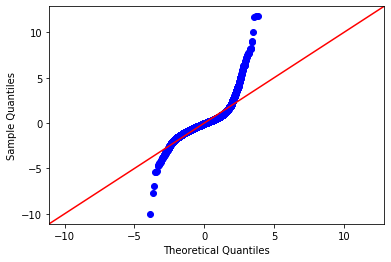

In [232]:
import scipy.stats as stats

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The model has a large tails, we will next check the residuals to determine whether the data needs to be altered.    

In [ ]:
Check homoskidastisity assumption.


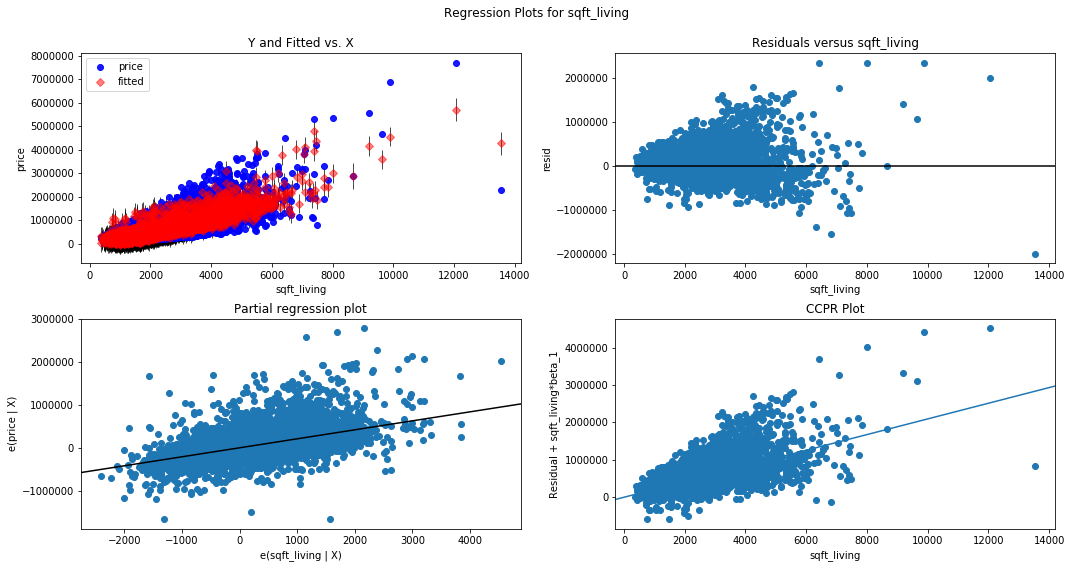

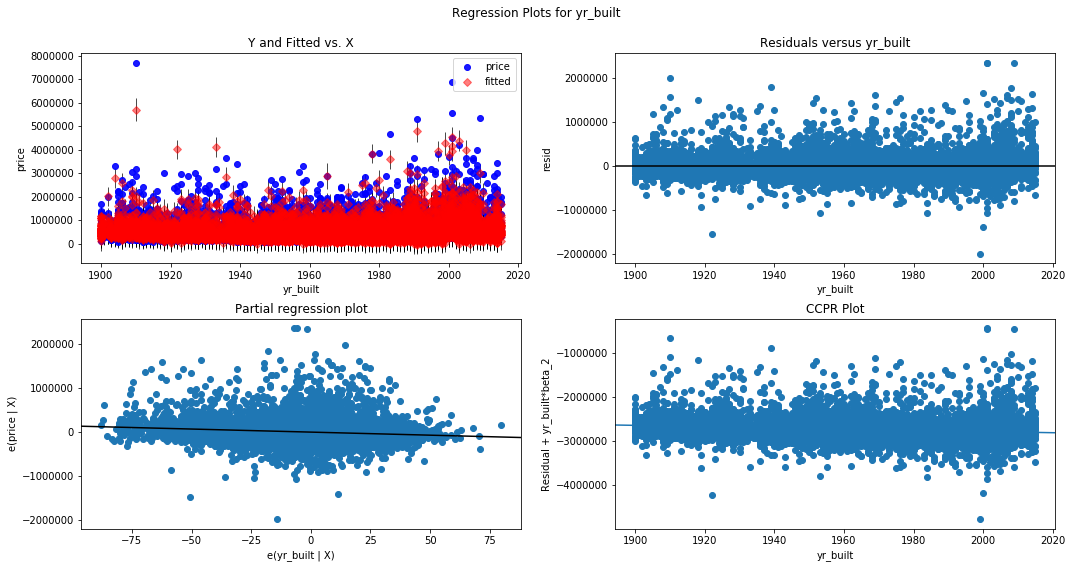

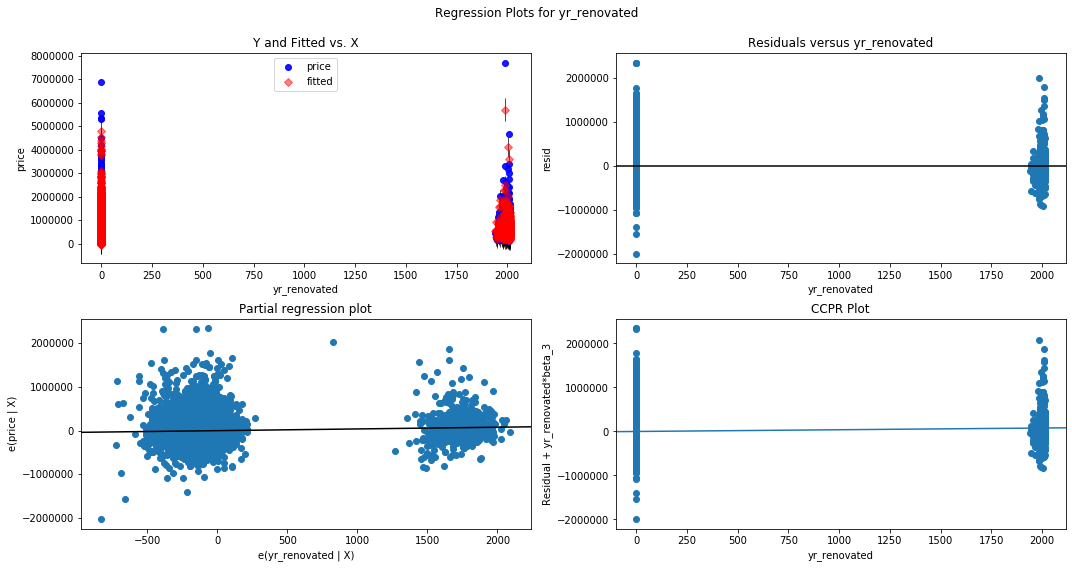

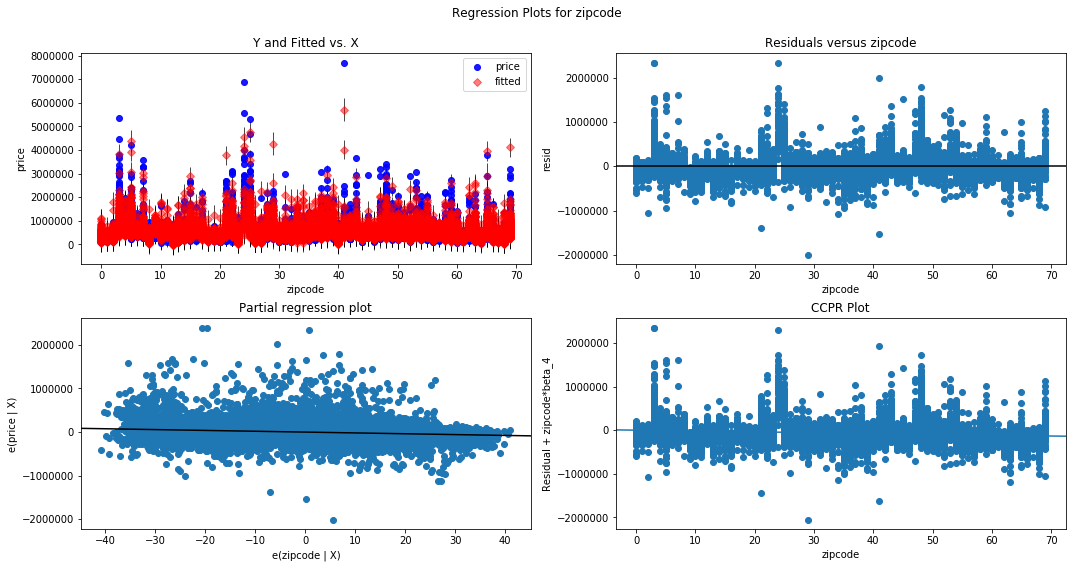

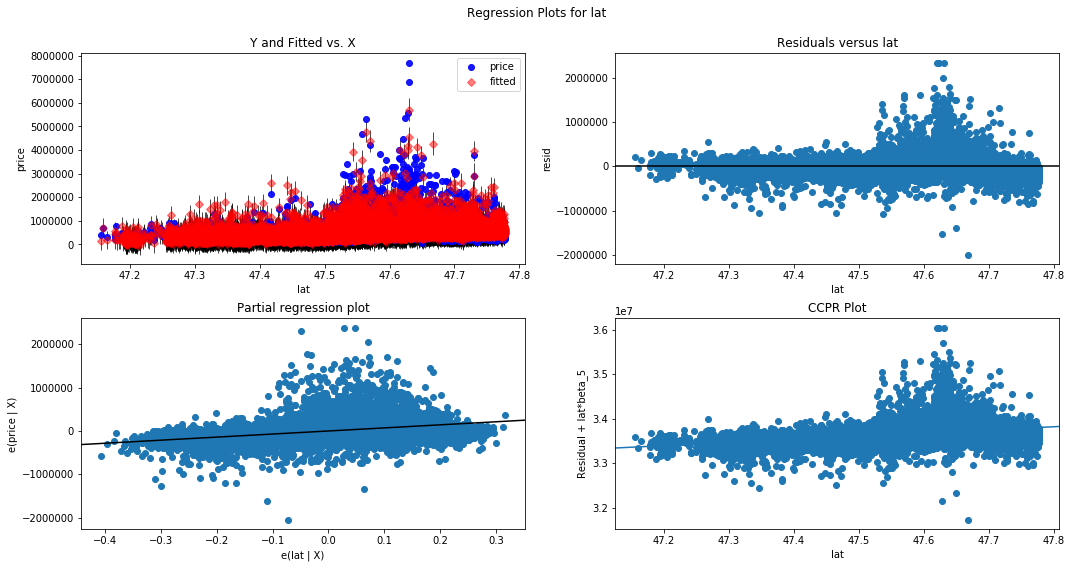

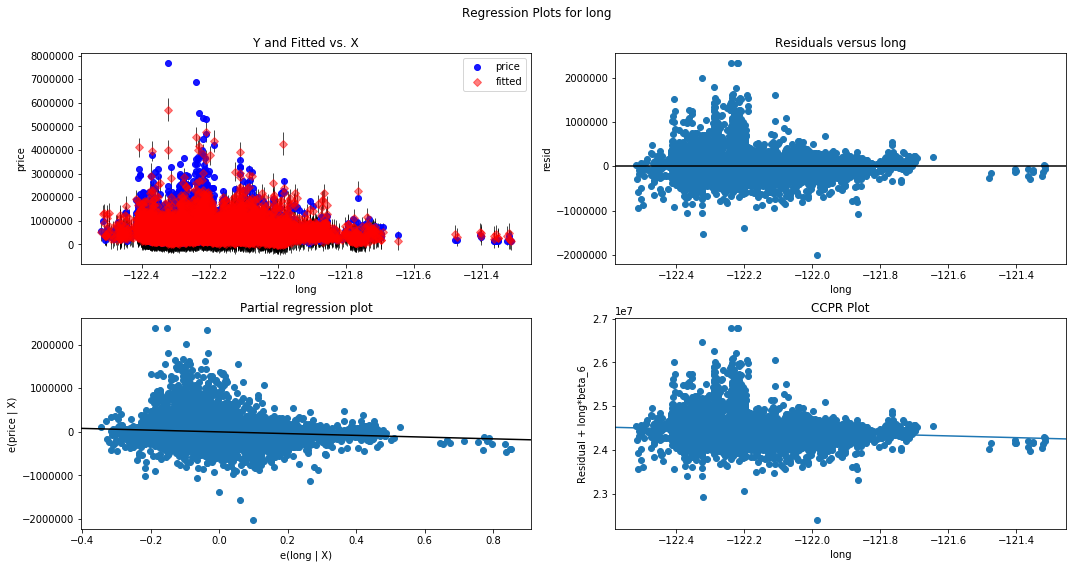

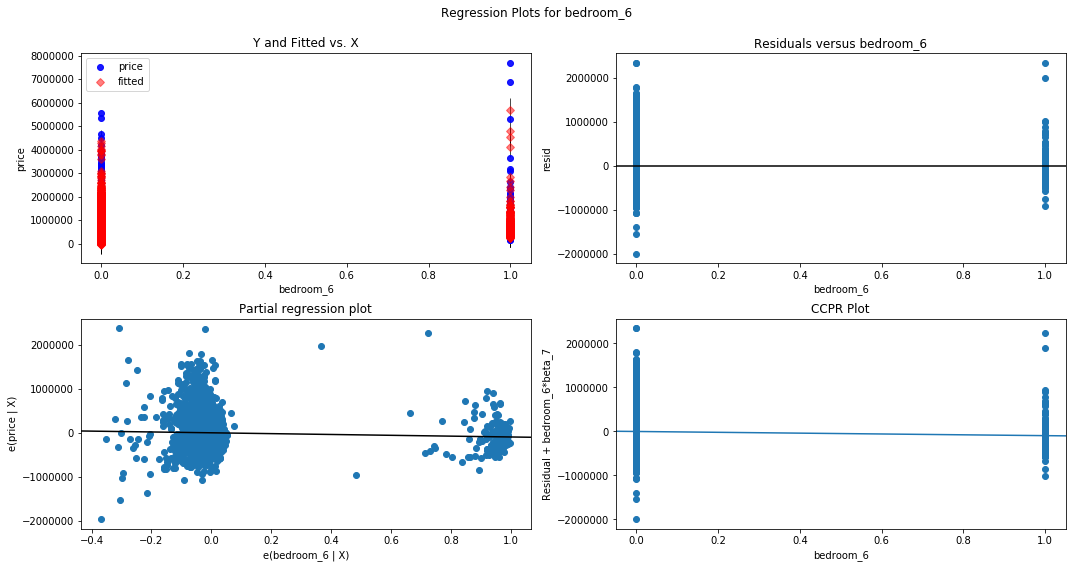

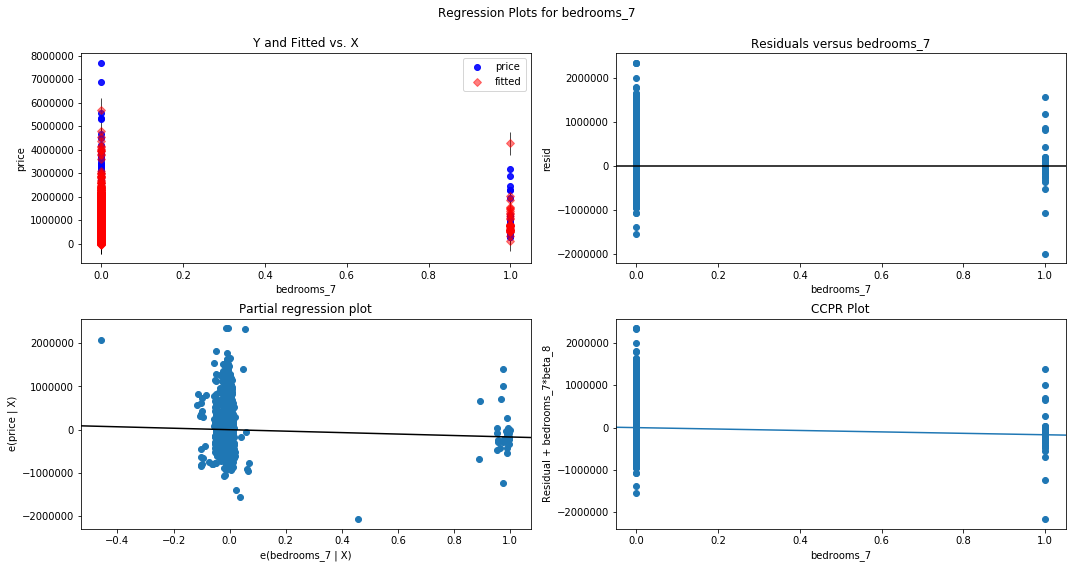

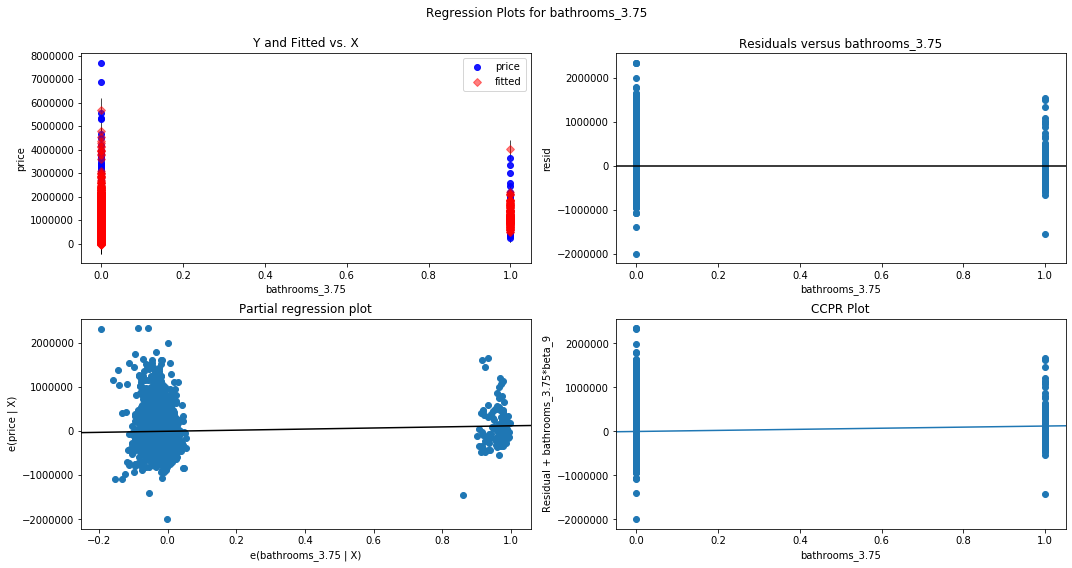

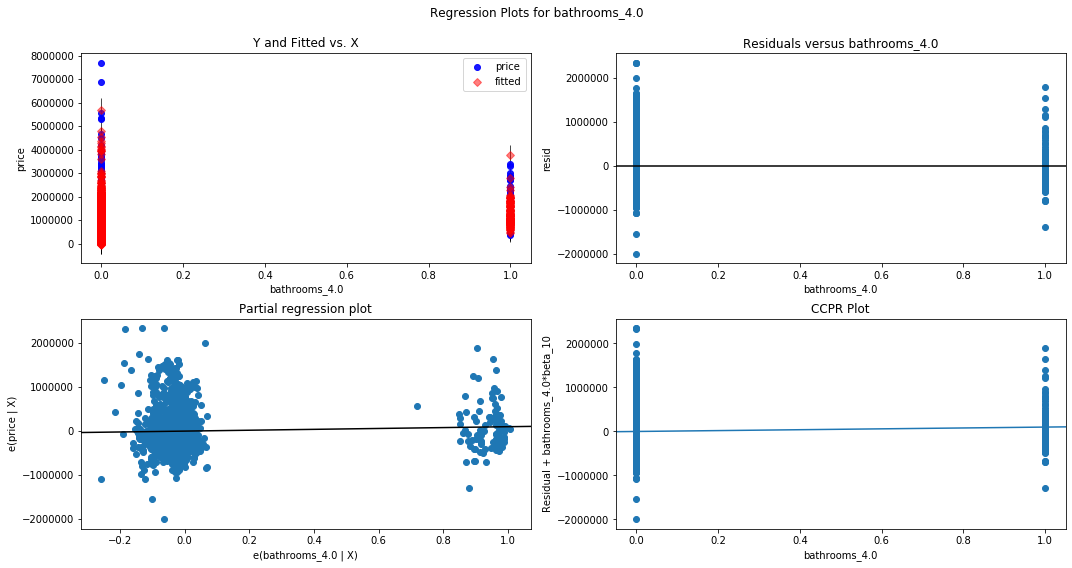

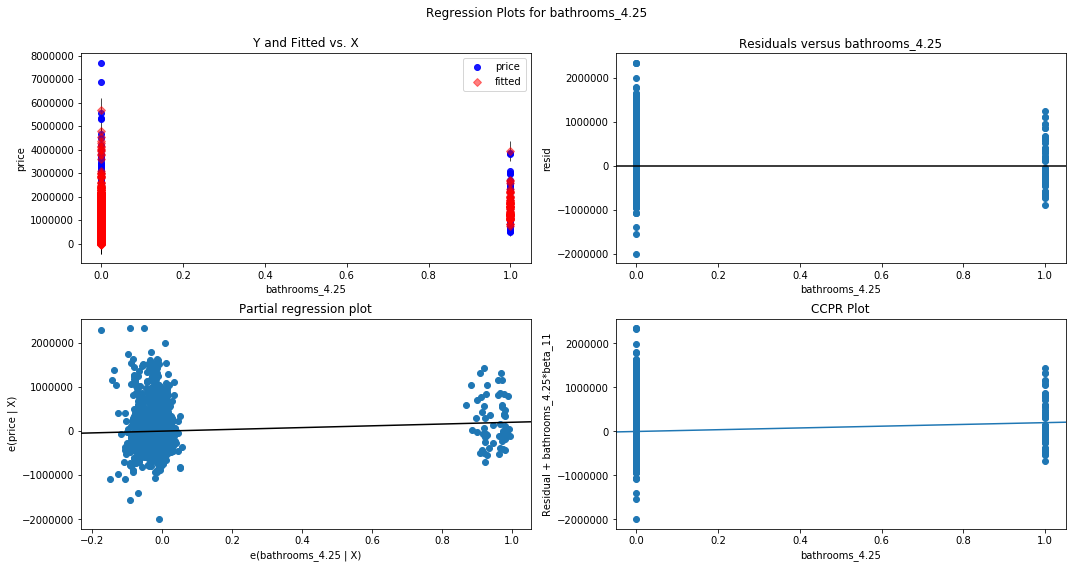

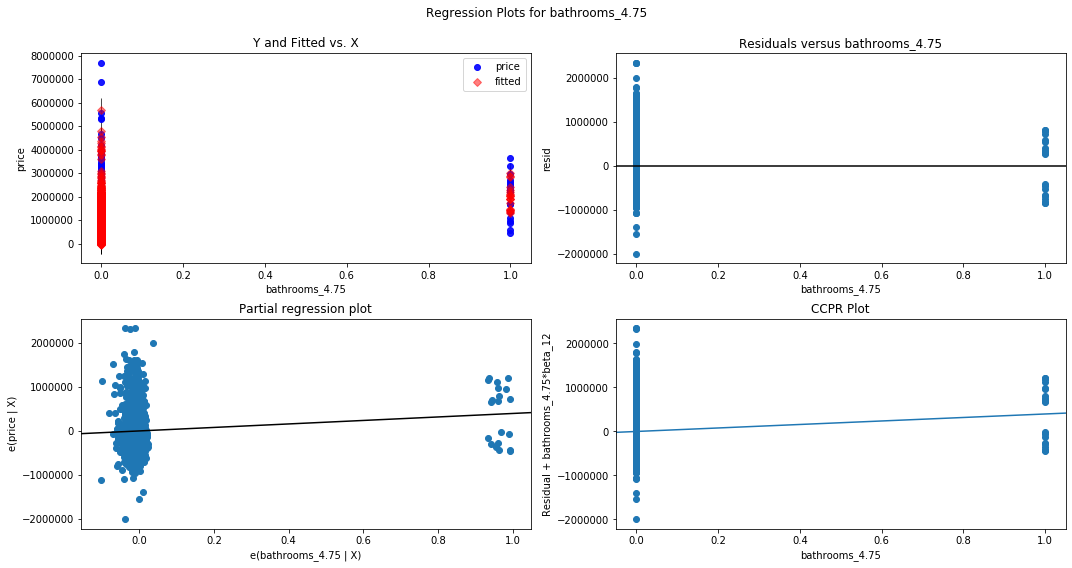

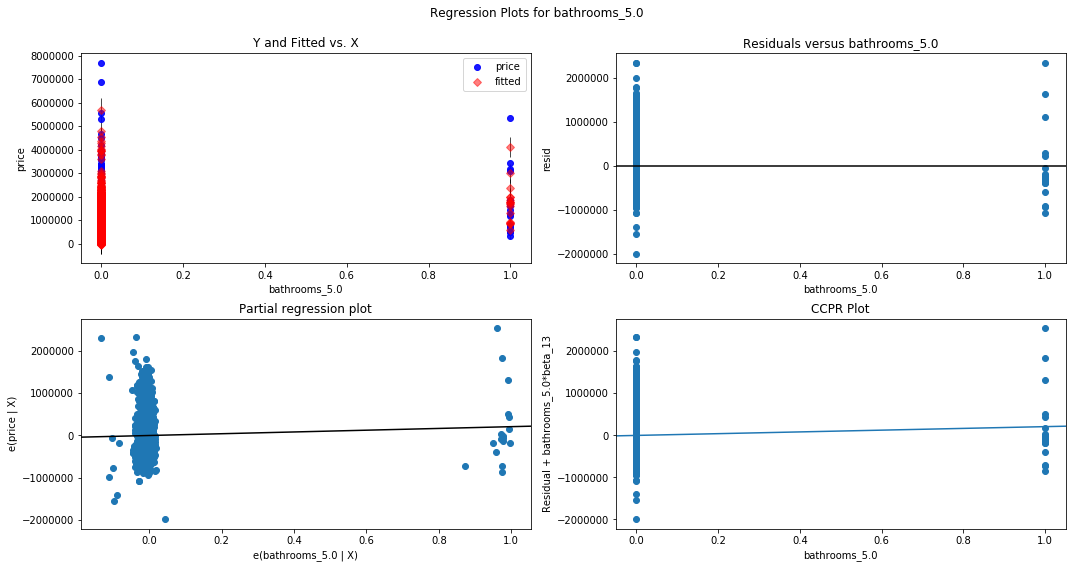

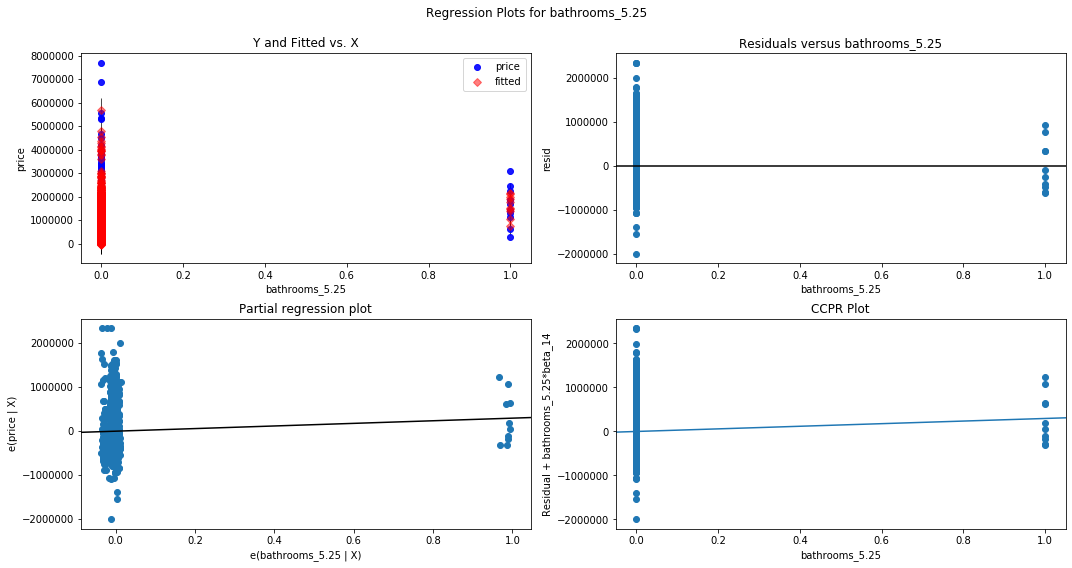

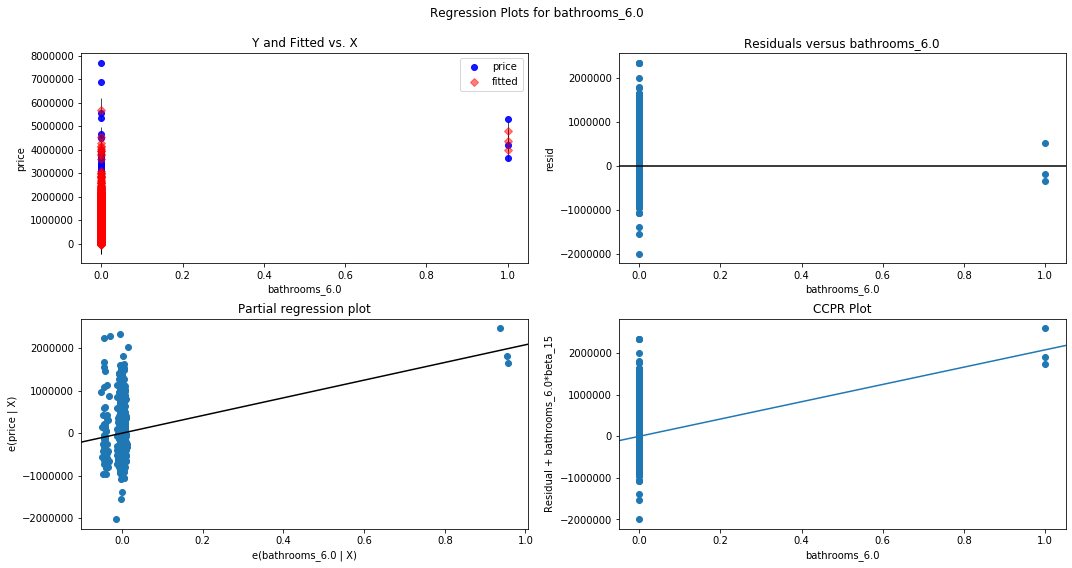

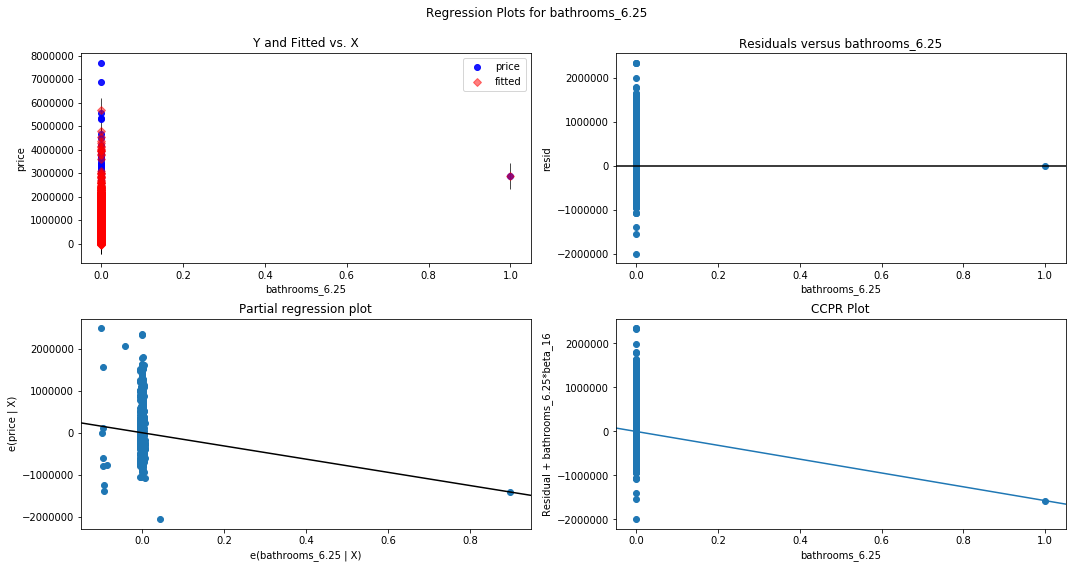

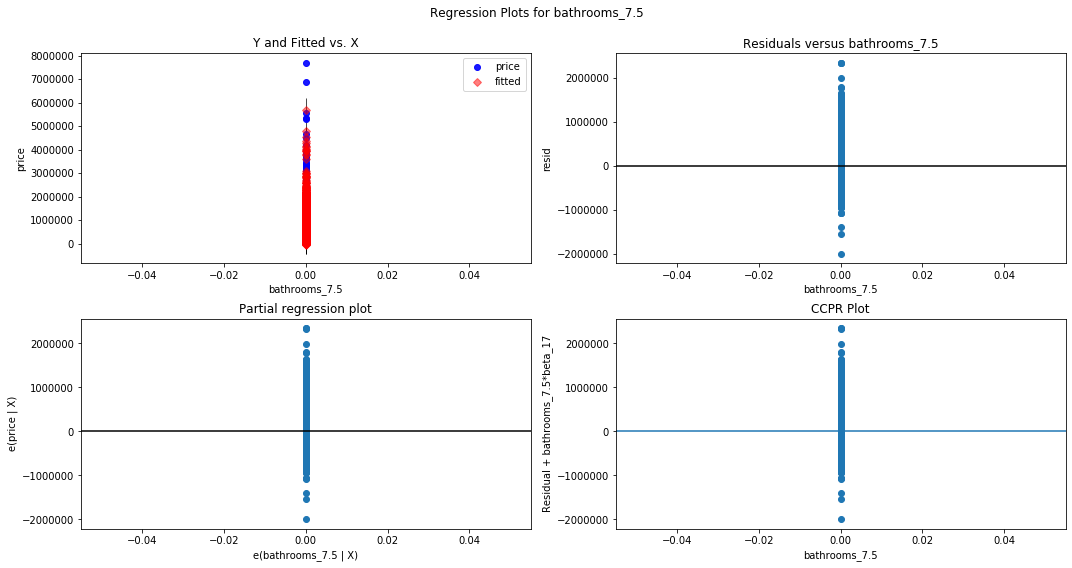

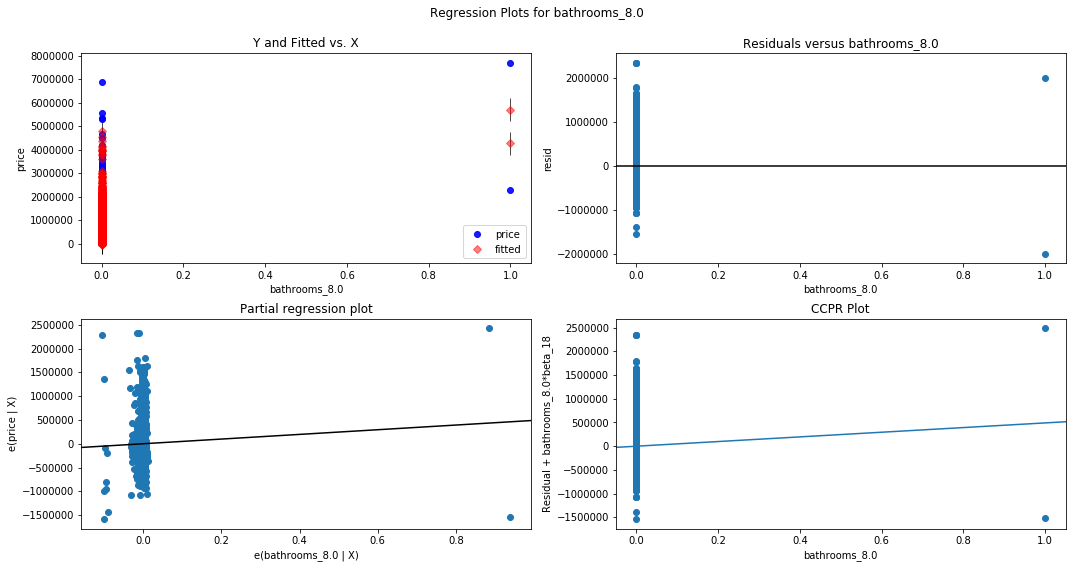

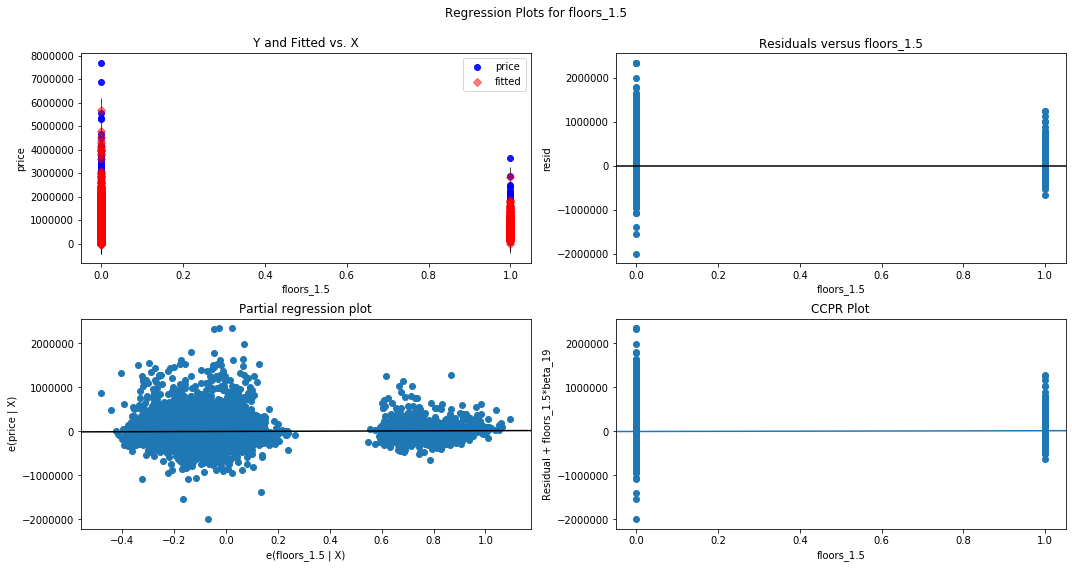

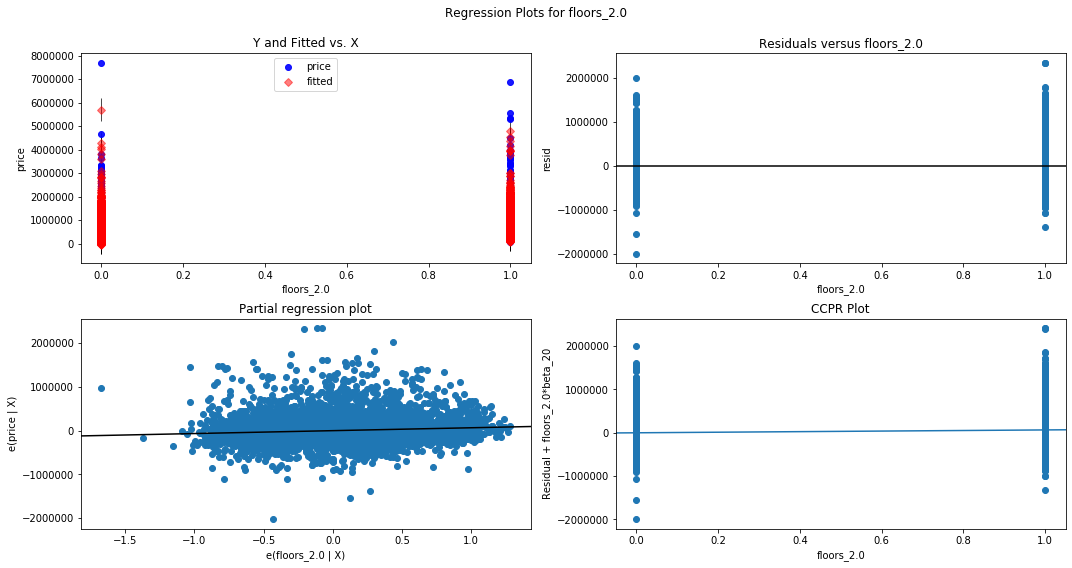

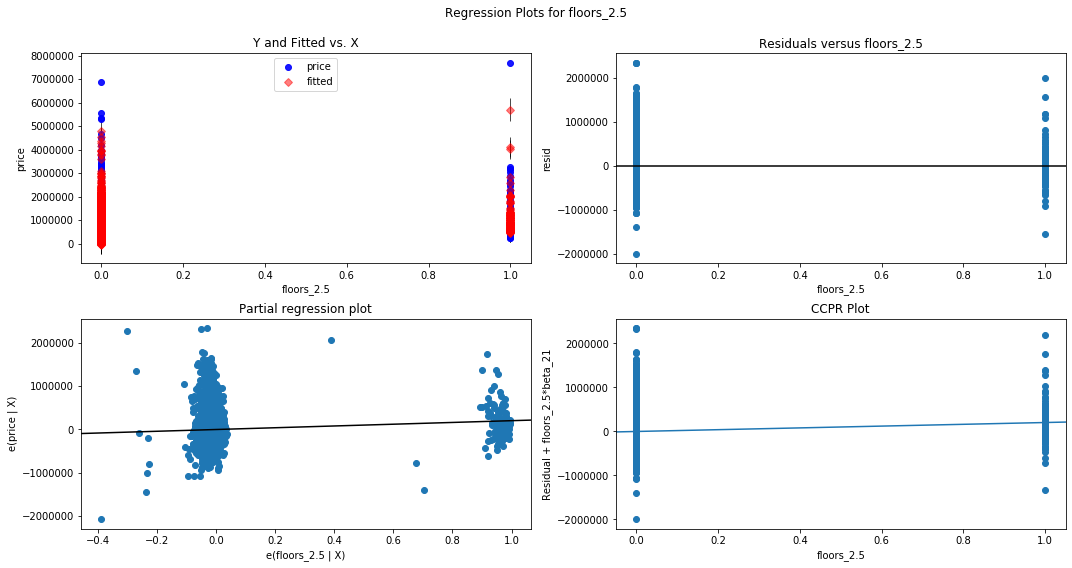

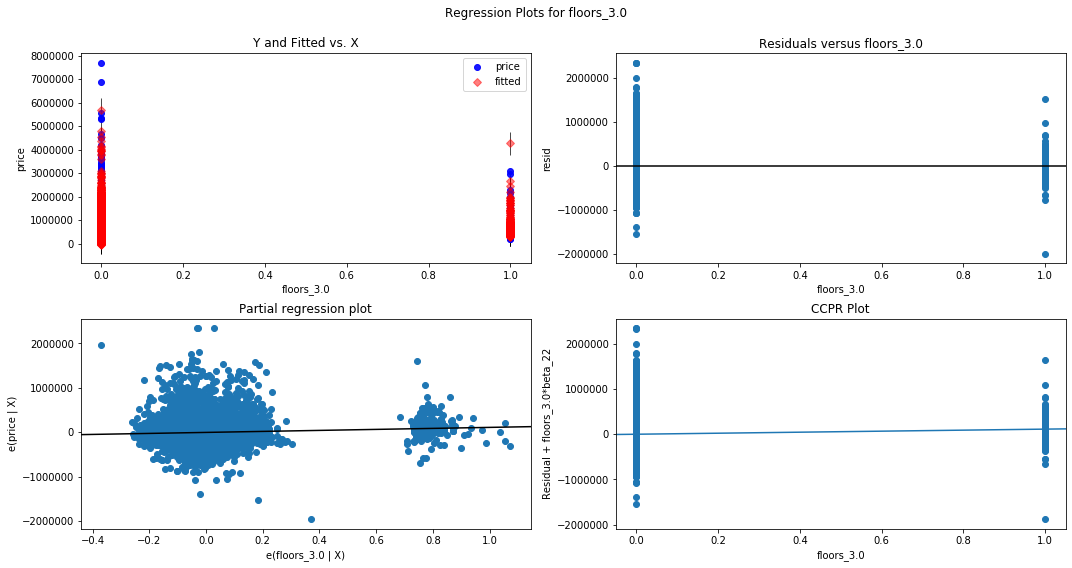

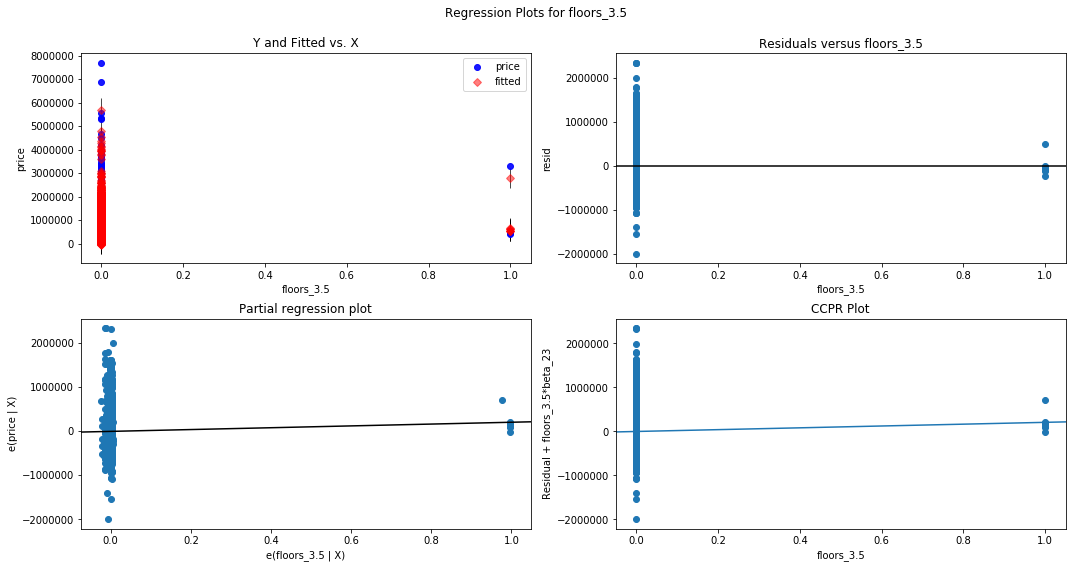

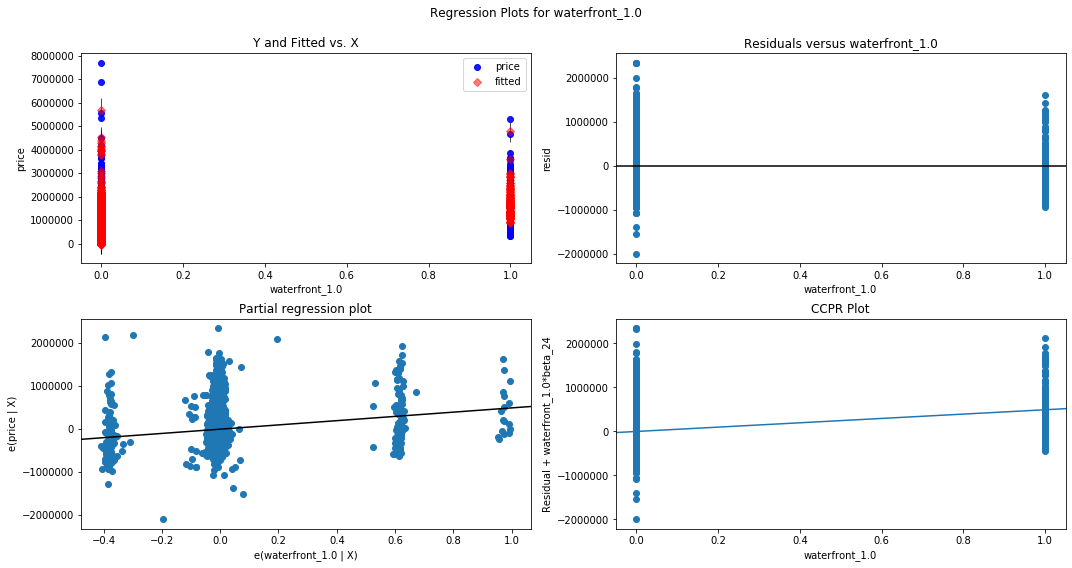

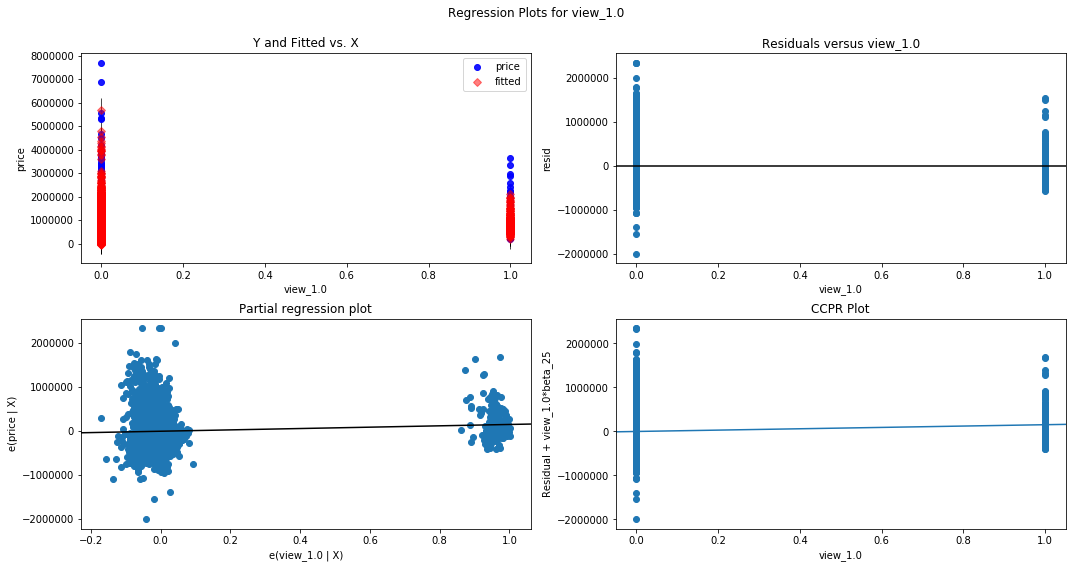

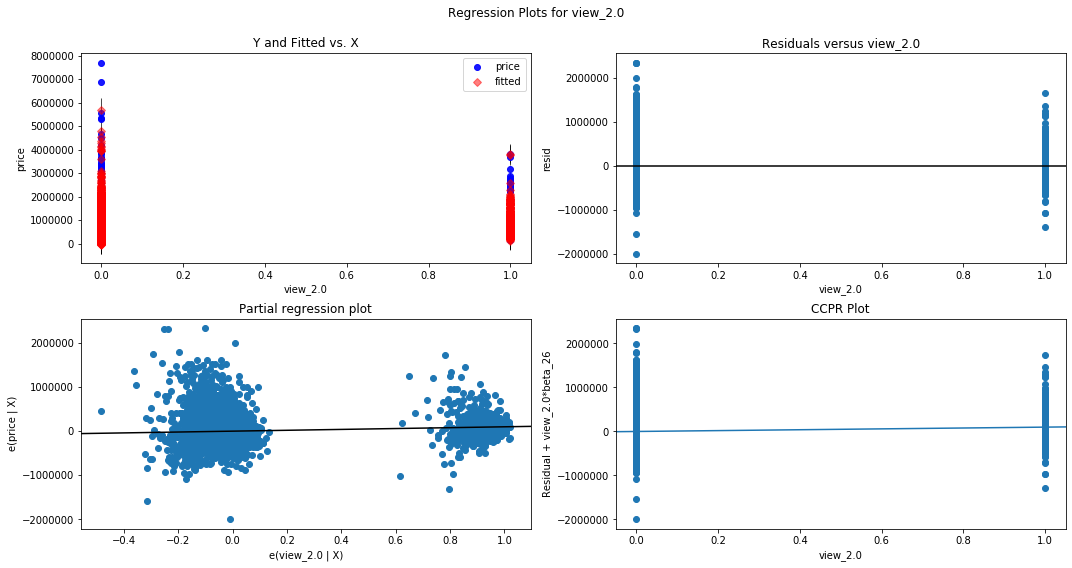

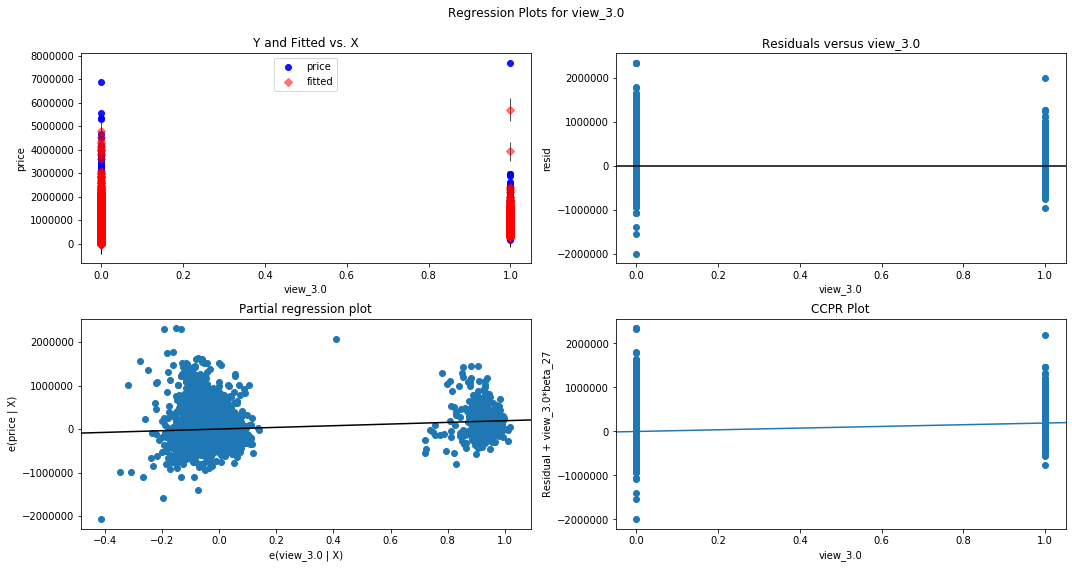

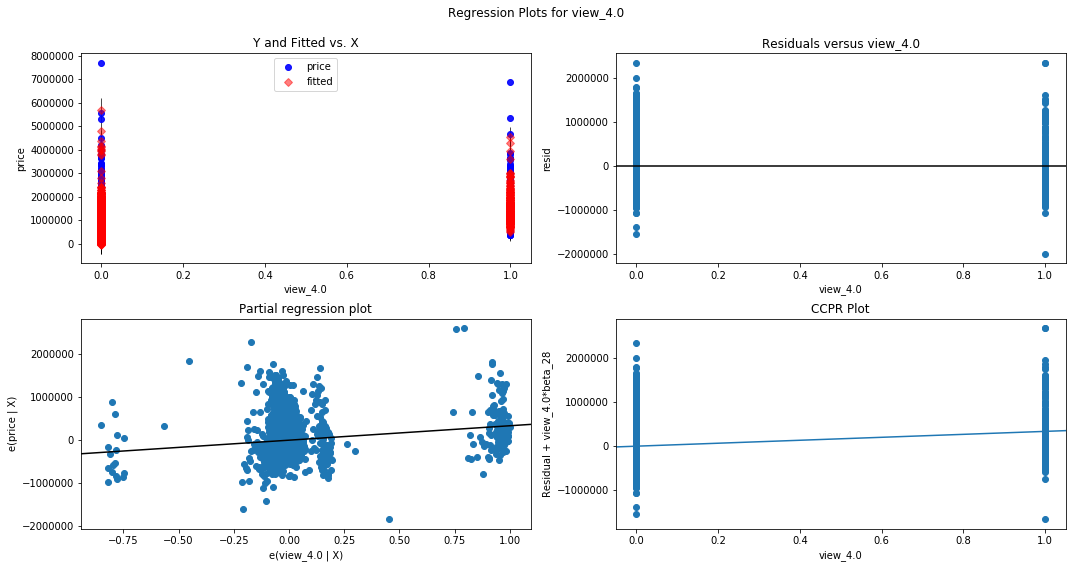

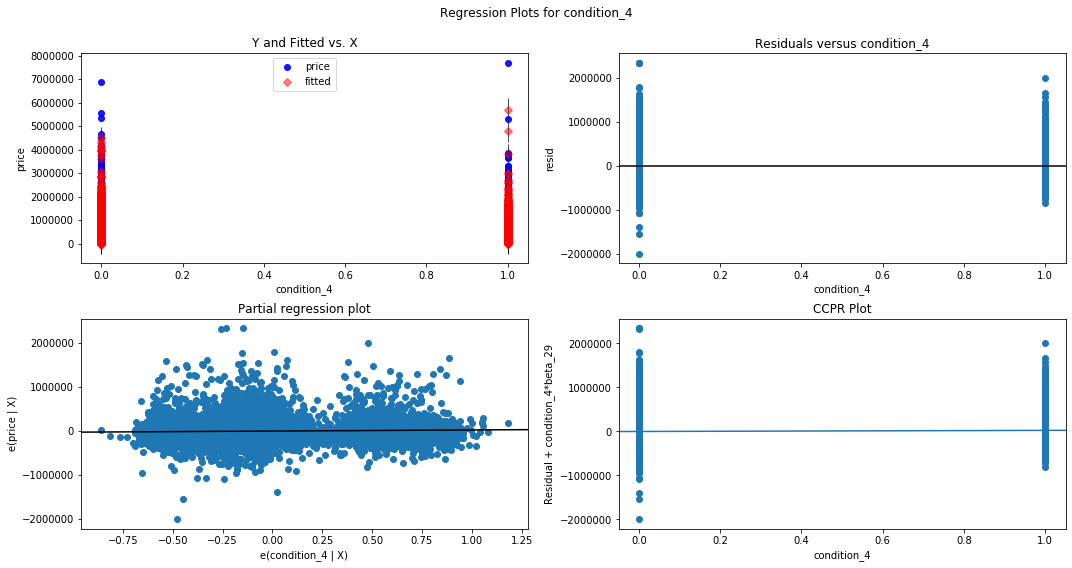

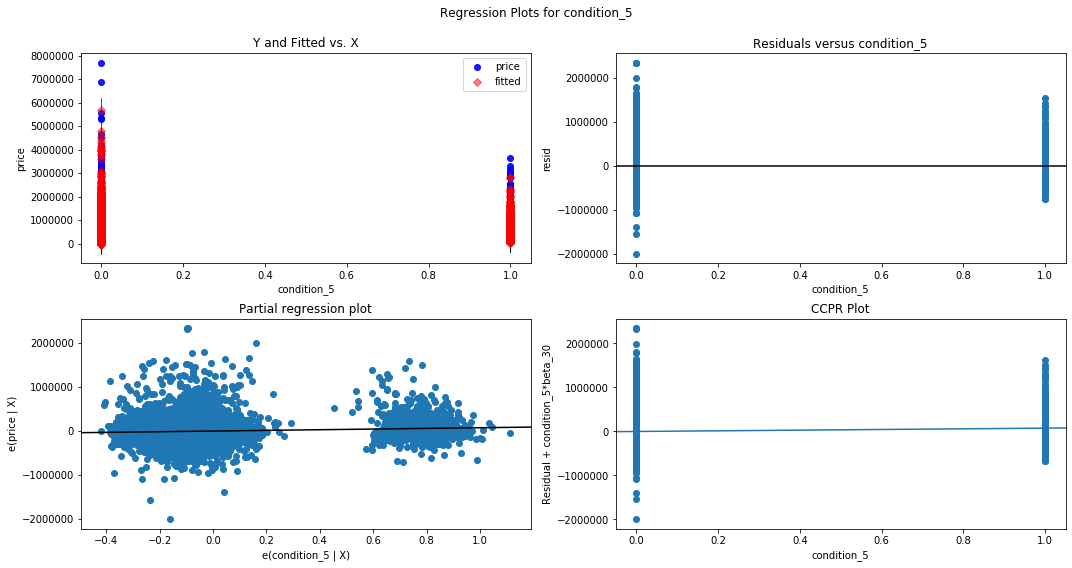

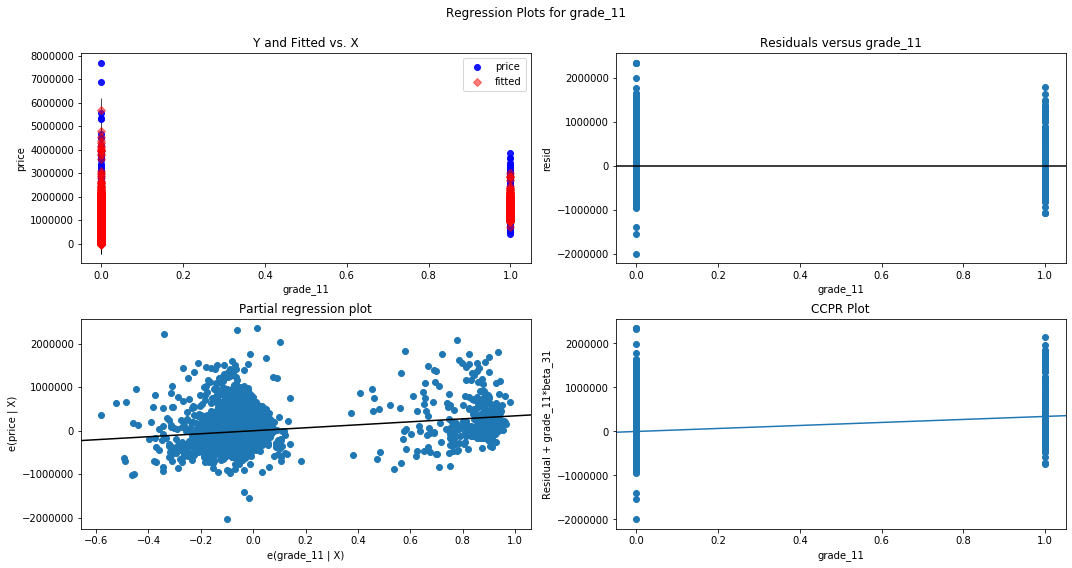

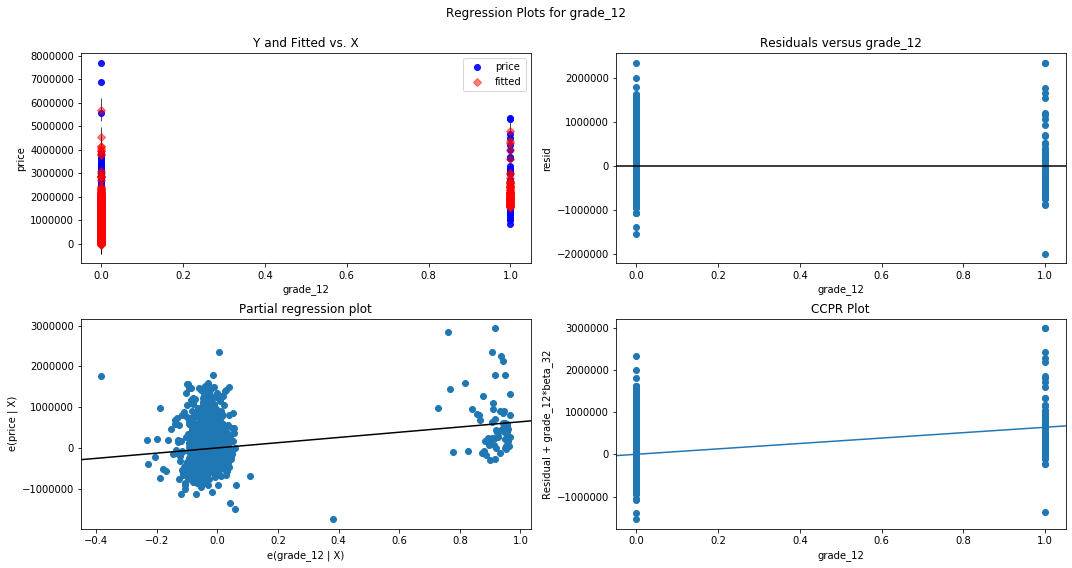

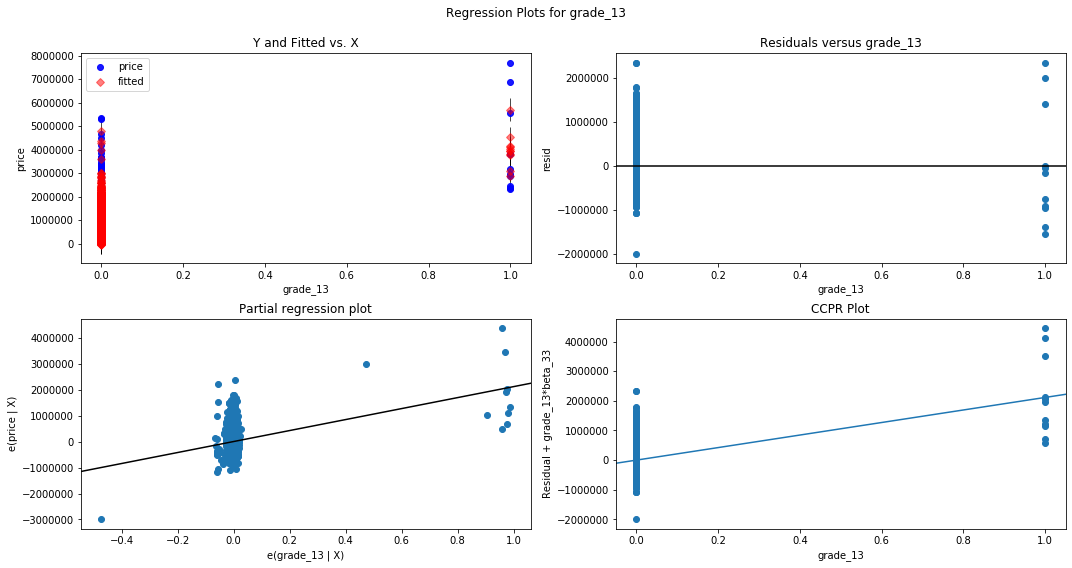

In [233]:
for columnName in X.columns:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, f'{columnName}', fig=fig)
    plt.show()


The residual are distributed relatively the same across X.  Let's run the Goldfeld Quandt test to confirm homoskedasticity.   

In [234]:
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 0.9332468888087745), ('p-value', 0.9993224861611019)]

The Goldfeld Quandt test confirms that residuals are dispersed the same by failing to reject the null hypothesis of homoskedasticity.  The data do not need to be adjusted.  

Let's find the interactions between features.

In [419]:
import statsmodels.formula.api as smf

for column in scaled_origin_df.columns:
    for columns in scaled_origin_df.columns:
        model_interaction = smf.ols(formula=f'price ~ {column} + {columns} + {column}:{columns}', data=scaled_origin_df).fit()
        summary = model_interaction.summary()
        print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.954
Date:                Sun, 15 Nov 2020   Prob (F-statistic):             0.0857
Time:                        13:56:13   Log-Likelihood:                 34849.
No. Observations:               21597   AIC:                        -6.969e+04
Df Residuals:                   21595   BIC:                        -6.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0596      0.001     85.355      0.0

In [383]:
Independent_Variables=origin_df

In [384]:

X_interact = pd.DataFrame()
X_interact['bedrooms_bathrooms'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['bathrooms'].astype('int64')
X_interact['bedrooms_sqft_living'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['sqft_living'].astype('int64')
X_interact['bedrooms_floors'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['floors'].astype('int64')
X_interact['bedrooms_waterfront'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['waterfront'].astype('int64')
X_interact['bedrooms_view'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['view'].astype('int64')
X_interact['bedrooms_condition'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['condition'].astype('int64')
X_interact['bedrooms_grade'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['grade'].astype('int64')
X_interact['bedrooms_sqft_above'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['bedrooms_yr_built'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['bedrooms_zipcode'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['bedrooms_lat'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['bedrooms_long'] = Independent_Variables['bedrooms'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['bathrooms_sqft_living'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['sqft_living'].astype('int64')
X_interact['bathrooms_sqft_lot'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['sqft_lot'].astype('int64')
X_interact['bathrooms_floors'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['floors'].astype('int64')
X_interact['bathrooms_view'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['view'].astype('int64')
X_interact['bathrooms_condition'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['condition'].astype('int64')
X_interact['bathrooms_sqft_above'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['bathrooms_yr_built'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['bathrooms_yr_renovated'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['yr_renovated'].astype('int64')
X_interact['bathrooms_zipcode'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['bathrooms_lat'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['bathrooms_long'] = Independent_Variables['bathrooms'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['sqft_living_floors'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['floors'].astype('int64')
X_interact['sqft_living_waterfront'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['waterfront'].astype('int64')
X_interact['sqft_living_view'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['view'].astype('int64')
X_interact['sqft_living_condition'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['condition'].astype('int64')
X_interact['sqft_living_grade'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['grade'].astype('int64')
X_interact['sqft_living_sqft_above'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['sqft_living_yr_built'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['sqft_living_yr_renovated'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['yr_renovated'].astype('int64')
X_interact['sqft_living_zipcode'] = Independent_Variables['sqft_living'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['sqft_lot_floors'] = Independent_Variables['sqft_lot'].astype('int64') * Independent_Variables['floors'].astype('int64')
X_interact['sqft_lot_waterfront'] = Independent_Variables['sqft_lot'].astype('int64') * Independent_Variables['waterfront'].astype('int64')
X_interact['sqft_lot_view'] = Independent_Variables['sqft_lot'].astype('int64') * Independent_Variables['view'].astype('int64')
X_interact['sqft_lot_condition'] = Independent_Variables['sqft_lot'].astype('int64') * Independent_Variables['condition'].astype('int64')
X_interact['sqft_lot_yr_built'] = Independent_Variables['sqft_lot'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['sqft_lot_zipcode'] = Independent_Variables['sqft_lot'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['floors_waterfront'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['waterfront'].astype('int64')
X_interact['floors_view'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['view'].astype('int64')
X_interact['floors_condition'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['condition'].astype('int64')
X_interact['floors_grade'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['grade'].astype('int64')
X_interact['floors_sqft_above'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['floors_yr_built'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['floors_yr_renovated'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['yr_renovated'].astype('int64')
X_interact['floors_lat'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['floors_long'] = Independent_Variables['floors'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['waterfront_view'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['view'].astype('int64')
X_interact['waterfront_condition'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['condition'].astype('int64')
X_interact['waterfront_grade'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['grade'].astype('int64')
X_interact['waterfront_sqft_above'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['waterfront_yr_built'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['waterfront_yr_renovated'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['yr_renovated'].astype('int64')
X_interact['waterfront_zipcode'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['waterfront_lat'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['waterfront_long'] = Independent_Variables['waterfront'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['view_grade'] = Independent_Variables['view'].astype('int64') * Independent_Variables['grade'].astype('int64')
X_interact['view_yr_built'] = Independent_Variables['view'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['view_yr_renovated'] = Independent_Variables['view'].astype('int64') * Independent_Variables['yr_renovated'].astype('int64')
X_interact['view_zipcode'] = Independent_Variables['view'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['view_lat'] = Independent_Variables['view'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['condition_grade'] = Independent_Variables['condition'].astype('int64') * Independent_Variables['grade'].astype('int64')
X_interact['condition_sqft_above'] = Independent_Variables['condition'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['condition_yr_built'] = Independent_Variables['condition'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['condition_zipcode'] = Independent_Variables['condition'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['condition_lat'] = Independent_Variables['condition'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['condition_long'] = Independent_Variables['condition'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['grade_sqft_above'] = Independent_Variables['grade'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['grade_yr_renovated'] = Independent_Variables['grade'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['grade_zipcode'] = Independent_Variables['grade'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['grade_lat'] = Independent_Variables['grade'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['grade_long'] = Independent_Variables['grade'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['grade_sqft_above'] = Independent_Variables['grade'].astype('int64') * Independent_Variables['sqft_above'].astype('int64')
X_interact['sqft_above_yr_built'] = Independent_Variables['sqft_above'].astype('int64') * Independent_Variables['yr_built'].astype('int64')
X_interact['sqft_above_yr_renovated'] = Independent_Variables['sqft_above'].astype('int64') * Independent_Variables['yr_renovated'].astype('int64')
X_interact['sqft_above_zipcode'] = Independent_Variables['sqft_above'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['sqft_above_lat'] = Independent_Variables['sqft_above'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['sqft_above_long'] = Independent_Variables['sqft_above'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['yr_built_zipcode'] = Independent_Variables['yr_built'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['yr_built_lat'] = Independent_Variables['yr_built'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['yr_built_long'] = Independent_Variables['yr_built'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['yr_renovated_zipcode'] = Independent_Variables['yr_renovated'].astype('int64') * Independent_Variables['zipcode'].astype('int64')
X_interact['yr_renovated_lat'] = Independent_Variables['yr_renovated'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['yr_renovated_long'] = Independent_Variables['yr_renovated'].astype('int64') * Independent_Variables['long'].astype('int64')
X_interact['zipcode_lat'] = Independent_Variables['zipcode'].astype('int64') * Independent_Variables['lat'].astype('int64')
X_interact['zipcode_long'] = Independent_Variables['zipcode'].astype('int64') * Independent_Variables['long'].astype('int64')






In [385]:
df3 = pd.concat([df1,X_interact], axis=1)
df3

sqft_living  yr_built  yr_renovated   zipcode       lat      long  \
0         0.061503  0.478261      0.000000  0.956522  0.571498  0.217608   
1         0.167046  0.443478      0.988089  0.797101  0.908959  0.166113   
2         0.030372  0.286957      0.000000  0.231884  0.936143  0.237542   
3         0.120729  0.565217      0.000000  0.840580  0.586939  0.104651   
4         0.099468  0.756522      0.000000  0.536232  0.741354  0.393688   
...            ...       ...           ...       ...       ...       ...   
21592     0.088079  0.947826      0.000000  0.608696  0.874055  0.143688   
21593     0.147304  0.991304      0.000000  0.869565  0.570693  0.130399   
21594     0.049355  0.947826      0.000000  0.855072  0.705324  0.182724   
21595     0.093394  0.904348      0.000000  0.217391  0.608975  0.373754   
21596     0.049355  0.939130      0.000000  0.855072  0.704842  0.182724   

       bedroom_6  bedrooms_7  bathrooms_3.75  bathrooms_4.0  ...  \
0            0.0         0.0             0.0            0.0  ...   
1            0.0         0.0             0.0            0.0  ...   
2            0.0         0.0             0.0            0.0  ...   
3            0.0         0.0             0.0            0.0  ...   
4            0.0         0.0             0.0            0.0  ...   
...          ...         ...             ...            ...  ...   
21592        0.0         0.0             0.0            0.0  ...   
21593        0.0         0.0             0.0            0.0  ...   
21594        0.0         0.0             0.0            0.0  ...   
21595        0.0         0.0             0.0            0.0  ...   
21596        0.0         0.0             0.0            0.0  ...   

       sqft_above_lat  sqft_above_long  yr_built_zipcode  yr_built_lat  \
0               55460          -143960            129030         91885   
1              101990          -264740            107305         91697   
2               36190           -93940             30928         90851   
3               49350          -128100            113970         92355   
4               78960          -204960             73519         93389   
...               ...              ...               ...           ...   
21592           71910          -186660             84378         94423   
21593          108570          -281820            120840         94658   
21594           47940          -124440            118531         94423   
21595           75200          -195200             30060         94188   
21596           47940          -124440            118472         94376   

       yr_built_long  yr_renovated_zipcode  yr_renovated_lat  \
0            -238510                     0                 0   
1            -238022                109505             93577   
2            -235826                     0                 0   
3            -239730                     0                 0   
4            -242414                     0                 0   
...              ...                   ...               ...   
21592        -245098                     0                 0   
21593        -245708                     0                 0   
21594        -245098                     0                 0   
21595        -244488                     0                 0   
21596        -244976                     0                 0   

       yr_renovated_long  zipcode_lat  zipcode_long  
0                      0         3102         -8052  
1                -242902         2585         -6710  
2                      0          752         -1952  
3                      0         2726         -7076  
4                      0         1739         -4514  
...                  ...          ...           ...  
21592                  0         1974         -5124  
21593                  0         2820         -7320  
21594                  0         2773         -7198  
21595                  0          705         -1830  
21596                  0 

In [386]:
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2, random_state=42)

In [190]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     568.1
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:22:32   Log-Likelihood:                 40997.
No. Observations:               17277   AIC:                        -8.177e+04
Df Residuals:                   17167   BIC:                        -8.092e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0019      0.000     -4.000      0.000      -0.003      -0.001
sqft_living                  3.5372      0.655      5.400      0.000       2.253       4.821
yr_built                     0.0317      0.008      4.000      0.000       0.016       0.047
yr_renovated             -1.615e-07   3.07e-08     -5.263      0.000   -2.22e-07   -1.01e-07
zipcode                    6.72e-07   6.18e-08     10.866      0.000    5.51e-07    7.93e-07
lat                          0.0515      0.001     58.547      0.000       0.050       0.053
long                        -0.0253      0.002    -10.237      0.000      -0.030      -0.020
bedroom_6                   -0.0019      0.002     -1.070      0.285      -0.005       0.002
bedrooms_7                  -0.0106      0.004     -2.502      0.012      -0.019      -0.002
bathrooms_3.75               0.0099      0.002      4.637      0.000       0.006       0.014
bathrooms_4.0               -0.0033      0.002     -1.371      0.170      -0.008       0.001
bathrooms_4.25               0.0045      0.003      1.466      0.143      -0.002       0.010
bathrooms_4.75               0.0187      0.005      3.504      0.000       0.008       0.029
bathrooms_5.0               -0.0056      0.006     -0.944      0.345      -0.017       0.006
bathrooms_5.25               0.0242      0.008      3.195      0.001       0.009       0.039
bathrooms_6.0                0.1829      0.015     12.157      0.000       0.153       0.212
bathrooms_6.25              -0.2356      0.025     -9.523      0.000      -0.284      -0.187
bathrooms_7.5            -4.941e-10   9.33e-11     -5.296      0.000   -6.77e-10   -3.11e-10
bathrooms_8.0               -0.0811      0.025     -3.309      0.001      -0.129      -0.033
floors_1.5                   0.0004      0.001      0.494      0.621      -0.001       0.002
floors_2.0                  -0.0014      0.002     -0.778      0.436      -0.005       0.002
floors_2.5                   0.0030      0.003      1.152      0.249      -0.002       0.008
floors_3.0                   0.0007      0.004      0.190      0.849      -0.006       0.008
floors_3.5                  -0.0004      0.005     -0.077      0.939      -0.011       0.010
waterfront_1.0           -1.867e-05   1.41e-05     -1.325      0.185   -4.63e-05    8.95e-06
view_1.0                     0.0114      0.001      8.019      0.000       0.009       0.014
view_2.0                    -0.0053      0.001     -5.653      0.000      -0.007      -0.003
view_3.0                    -0.0048      0.001     -4.343      0.000      -0.007      -0.003
view_4.0                     0.0034      0.001      3.302      0.001       0.001       0.005
condition_4                 -0.0028      0.002     -1.580      0.114      -0.006       0.001
condition_5   

Remove statistically insignificant featutes.

In [387]:
df3=df3.drop(['bedroom_6'],axis=1)
df3=df3.drop(['bathrooms_4.0'],axis=1)
df3=df3.drop(['bathrooms_4.25'],axis=1)
df3=df3.drop(['bathrooms_5.0'],axis=1)
df3=df3.drop(['floors_1.5'],axis=1)
df3=df3.drop(['waterfront_1.0'],axis=1)
df3=df3.drop(['condition_4'],axis=1)
df3=df3.drop(['condition_5'],axis=1)
df3=df3.drop(['grade_12'],axis=1)
df3=df3.drop(['bedrooms_waterfront'],axis=1)
df3=df3.drop(['bedrooms_view'],axis=1)
df3=df3.drop(['bedrooms_bathrooms'],axis=1)
df3=df3.drop(['bedrooms_sqft_above'],axis=1)
df3=df3.drop(['bedrooms_zipcode'],axis=1)
df3=df3.drop(['bedrooms_lat'],axis=1)
df3=df3.drop(['bedrooms_long'],axis=1)
df3=df3.drop(['bedrooms_sqft_living'],axis=1)
df3=df3.drop(['bathrooms_condition'],axis=1)
df3=df3.drop(['bathrooms_yr_renovated'],axis=1)
df3=df3.drop(['bathrooms_long'],axis=1)
df3=df3.drop(['sqft_living_waterfront'],axis=1)
df3=df3.drop(['sqft_lot_floors'],axis=1)
df3=df3.drop(['sqft_lot_waterfront'],axis=1)
df3=df3.drop(['floors_view'],axis=1)
df3=df3.drop(['floors_grade'],axis=1)
df3=df3.drop(['floors_yr_renovated'],axis=1)
df3=df3.drop(['floors_lat'],axis=1)
df3=df3.drop(['waterfront_view'],axis=1)
df3=df3.drop(['waterfront_condition'],axis=1)
df3=df3.drop(['waterfront_grade'],axis=1)
df3=df3.drop(['waterfront_yr_built'],axis=1)
df3=df3.drop(['waterfront_lat'],axis=1)
df3=df3.drop(['waterfront_long'],axis=1)
df3=df3.drop(['view_yr_renovated'],axis=1)
df3=df3.drop(['view_zipcode'],axis=1)
df3=df3.drop(['condition_lat'],axis=1)
df3=df3.drop(['condition_long'],axis=1)
df3=df3.drop(['sqft_above_yr_built'],axis=1)

In [388]:
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2, random_state=42)

In [193]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     821.9
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:22:44   Log-Likelihood:                 40863.
No. Observations:               17277   AIC:                        -8.158e+04
Df Residuals:                   17202   BIC:                        -8.099e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0023      0.001      2.658      0.008       0.001       0.004
sqft_living                  4.3353      0.360     12.051      0.000       3.630       5.040
yr_built                    -0.0380      0.014     -2.658      0.008      -0.066      -0.010
yr_renovated              7.547e-08    7.6e-09      9.933      0.000    6.06e-08    9.04e-08
zipcode                   4.839e-07   6.15e-08      7.873      0.000    3.63e-07    6.04e-07
lat                          0.0514      0.001     58.470      0.000       0.050       0.053
long                        -0.0261      0.002    -10.580      0.000      -0.031      -0.021
bedrooms_7                  -0.0158      0.004     -3.901      0.000      -0.024      -0.008
bathrooms_3.75               0.0090      0.002      4.212      0.000       0.005       0.013
bathrooms_4.75               0.0194      0.005      3.659      0.000       0.009       0.030
bathrooms_5.25               0.0208      0.007      2.790      0.005       0.006       0.035
bathrooms_6.0                0.1719      0.014     12.288      0.000       0.144       0.199
bathrooms_6.25              -0.2275      0.025     -9.216      0.000      -0.276      -0.179
bathrooms_7.5             1.131e-08   9.27e-10     12.195      0.000    9.49e-09    1.31e-08
bathrooms_8.0               -0.0599      0.023     -2.579      0.010      -0.105      -0.014
floors_2.0                   0.2654      0.233      1.141      0.254      -0.190       0.721
floors_2.5                   0.2711      0.233      1.166      0.244      -0.185       0.727
floors_3.0                   0.5327      0.465      1.145      0.252      -0.380       1.445
floors_3.5                   0.5313      0.465      1.142      0.254      -0.381       1.444
view_1.0                     0.0104      0.001      7.333      0.000       0.008       0.013
view_2.0                    -0.0067      0.001     -7.302      0.000      -0.009      -0.005
view_3.0                    -0.0064      0.001     -5.975      0.000      -0.009      -0.004
view_4.0                     0.0056      0.001      5.671      0.000       0.004       0.007
grade_11                    -0.0033      0.002     -2.030      0.042      -0.006      -0.000
grade_13                     0.0887      0.008     10.505      0.000       0.072       0.105
bedrooms_floors              0.0020      0.001      3.691      0.000       0.001       0.003
bedrooms_condition          -0.0002      0.000     -0.503      0.615      -0.001       0.001
bedrooms_grade              -0.0005      0.000     -2.229      0.026      -0.001    -6.4e-05
bedrooms_yr_built         3.392e-07    1.1e-06      0.309      0.758   -1.82e-06    2.49e-06
bathrooms_sqft_living    -2.943e-06    6.5e-07     -4.526      0.000   -4.22e-06   -1.67e-06
bathrooms_sqft

In [389]:
df3=df3.drop(['yr_built'],axis=1)
df3=df3.drop(['yr_renovated'],axis=1)
df3=df3.drop(['bathrooms_7.5'],axis=1)
df3=df3.drop(['floors_2.0'],axis=1)
df3=df3.drop(['floors_2.5'],axis=1)
df3=df3.drop(['floors_3.0'],axis=1)
df3=df3.drop(['floors_3.5'],axis=1)
df3=df3.drop(['bedrooms_condition'],axis=1)
df3=df3.drop(['bedrooms_yr_built'],axis=1)
df3=df3.drop(['floors_waterfront'],axis=1)
df3=df3.drop(['floors_condition'],axis=1)
df3=df3.drop(['floors_long'],axis=1)

In [390]:
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2, random_state=42)

In [196]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     933.9
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:22:53   Log-Likelihood:                 40846.
No. Observations:               17277   AIC:                        -8.156e+04
Df Residuals:                   17211   BIC:                        -8.105e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2164      0.060      3.599      0.000       0.099       0.334
sqft_living                  4.0862      0.342     11.963      0.000       3.417       4.756
zipcode                  -8.024e-06   7.22e-07    -11.110      0.000   -9.44e-06   -6.61e-06
lat                          0.0516      0.001     59.067      0.000       0.050       0.053
long                        -0.0276      0.002    -11.250      0.000      -0.032      -0.023
bedrooms_7                  -0.0156      0.004     -3.874      0.000      -0.024      -0.008
bathrooms_3.75               0.0093      0.002      4.376      0.000       0.005       0.014
bathrooms_4.75               0.0199      0.005      3.773      0.000       0.010       0.030
bathrooms_5.25               0.0200      0.007      2.687      0.007       0.005       0.035
bathrooms_6.0                0.1726      0.014     12.344      0.000       0.145       0.200
bathrooms_6.25              -0.2296      0.025     -9.305      0.000      -0.278      -0.181
bathrooms_8.0               -0.0594      0.023     -2.577      0.010      -0.105      -0.014
view_1.0                     0.0104      0.001      7.334      0.000       0.008       0.013
view_2.0                    -0.0066      0.001     -7.180      0.000      -0.008      -0.005
view_3.0                    -0.0063      0.001     -5.872      0.000      -0.008      -0.004
view_4.0                     0.0054      0.001      5.534      0.000       0.003       0.007
grade_11                    -0.0033      0.002     -2.008      0.045      -0.006    -7.8e-05
grade_13                     0.0901      0.008     10.757      0.000       0.074       0.106
bedrooms_floors              0.0016      0.001      3.142      0.002       0.001       0.003
bedrooms_grade              -0.0005      0.000     -4.505      0.000      -0.001      -0.000
bathrooms_sqft_living    -2.757e-06   6.46e-07     -4.265      0.000   -4.02e-06   -1.49e-06
bathrooms_sqft_lot       -5.898e-08   4.97e-09    -11.863      0.000   -6.87e-08   -4.92e-08
bathrooms_floors            -0.0063      0.001     -8.254      0.000      -0.008      -0.005
bathrooms_view               0.0019      0.000      4.879      0.000       0.001       0.003
bathrooms_sqft_above      8.355e-06   7.79e-07     10.727      0.000    6.83e-06    9.88e-06
bathrooms_yr_built           0.0001   1.41e-05      9.247      0.000       0.000       0.000
bathrooms_zipcode            0.0001   2.05e-05      6.255      0.000    8.79e-05       0.000
bathrooms_lat               -0.0055      0.001     -9.348      0.000      -0.007      -0.004
sqft_living_floors        6.397e-06   1.13e-06      5.646      0.000    4.18e-06    8.62e-06
sqft_living_view         -1.175e-06   3.76e-07     -3.125      0.002   -1.91e-06   -4.38e-07
sqft_living_co

Degrees of freedom are the number of independent ways by which, without violating model constraint, 
values are free to varry. 
The model has 65 parameters used to explain 17,277 residuals.

R-squared is the proportion of the variance for a dependent variable that is explained by an independent variable.
78 percent of dependent variable variance is explaind by independent variable variance.
R-squared increses for every feature added, regardless of statistical significance.  
Adjusted R-squared increases only if each feature improves the model more than expected by chance.  

Now we have found the optimal features to use for linear regression.

Linear regression model:

In [391]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [392]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [393]:
import joblib

joblib.dump(lin_reg, "lin_reg.pkl")

['lin_reg.pkl']

In [394]:
load_lin_reg = joblib.load("lin_reg.pkl")
load_lin_reg

LinearRegression()

In [395]:
y_hat_lin = lin_reg.predict(X_train)

In [396]:
for i,c in zip(lin_reg.coef_,df3.columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: sqft_living, Score: 4.086149718734146
Feature: zipcode, Score: 5.98328373237805e-07
Feature: lat, Score: 0.051644560192121956
Feature: long, Score: -0.027556178306163394
Feature: bedrooms_7, Score: -0.015609558808564922
Feature: bathrooms_3.75, Score: 0.009338233748055385
Feature: bathrooms_4.75, Score: 0.01993895269547231
Feature: bathrooms_5.25, Score: 0.02003386052944323
Feature: bathrooms_6.0, Score: 0.17263045103987226
Feature: bathrooms_6.25, Score: -0.22955879453003109
Feature: bathrooms_8.0, Score: -0.059364252744914574
Feature: view_1.0, Score: 0.010447748590039005
Feature: view_2.0, Score: -0.006573821284506732
Feature: view_3.0, Score: -0.006297770682317517
Feature: view_4.0, Score: 0.005404018694025232
Feature: grade_11, Score: -0.0032583589183368044
Feature: grade_13, Score: 0.09007562711701267
Feature: bedrooms_floors, Score: 0.001637286375813994
Feature: bedrooms_grade, Score: -0.00045806543752765366
Feature: bathrooms_sqft_living, Score: -2.757147886440577e-06


The bias–variance tradeoff is the property of a model that the variance of the parameter estimates across samples can be reduced by increasing the bias in the estimated parameters.  Low bias and high variance indicate a model that favors overfitting.  

In [397]:

def bias(y, y_hat):
    return np.mean(y_hat - y)

def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

b = bias(y_train, y_hat_lin) 
v = variance(y_hat_lin) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 6.155036253783088e-16 
Train variance: 0.0018256262494767677


Root Mean Square Error is the standard deviation of the residuals, a high R sqaured and low MSE indicates a well fitted model.  

In [398]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_train,y_hat_lin)
train_mse = mean_squared_error(y_train, y_hat_lin)
print('R^2:',r2)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))

R^2: 0.7791046265343264
Train Root Mean Squarred Error: 0.022751045246139367


The cross validation results  are similar to the rmse, indicating a well fitted model. 

In [399]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results_train = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring=mse)
print('Cross Validation Results:',np.sqrt(cv_5_results_train))



Cross Validation Results: [0.02425173 0.02318828 0.02341459 0.02292448 0.02310921]


Regularization regression model:

In [400]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train, y_train)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.64728e-21): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1, solver='cholesky')

In [401]:
joblib.dump(ridge_reg, "ridge_reg.pkl")

['ridge_reg.pkl']

In [402]:
load_ridge_reg = joblib.load("ridge_reg.pkl")
load_ridge_reg

Ridge(alpha=1, solver='cholesky')

In [403]:
y_hat_ridge = ridge_reg.predict(X_train)

In [404]:
for i,c in zip(ridge_reg.coef_,df3.columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: sqft_living, Score: 0.01818650702567517
Feature: zipcode, Score: 6.084070383739541e-07
Feature: lat, Score: 0.051219709753871995
Feature: long, Score: -0.027917446334080723
Feature: bedrooms_7, Score: -0.014321952973415302
Feature: bathrooms_3.75, Score: 0.009377434713891459
Feature: bathrooms_4.75, Score: 0.020398376216413674
Feature: bathrooms_5.25, Score: 0.018089634279600662
Feature: bathrooms_6.0, Score: 0.12810007919420263
Feature: bathrooms_6.25, Score: -0.09815871676047301
Feature: bathrooms_8.0, Score: -0.013357224238717175
Feature: view_1.0, Score: 0.0101207742253984
Feature: view_2.0, Score: -0.006145080274313507
Feature: view_3.0, Score: -0.005590152863079482
Feature: view_4.0, Score: 0.004743853095126176
Feature: grade_11, Score: -0.0035804403330031488
Feature: grade_13, Score: 0.07679215549619409
Feature: bedrooms_floors, Score: 0.0014279132484313847
Feature: bedrooms_grade, Score: -0.00038061520646010856
Feature: bathrooms_sqft_living, Score: -3.805873417719762e

In [407]:
b = bias(y_train, y_hat_ridge) 
v = variance(y_hat_ridge) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: -9.132061509333187e-16 
Train variance: 0.0018158507178616338


In [408]:
r2 = r2_score(y_train,y_hat_ridge)
train_mse = mean_squared_error(y_train, y_hat_ridge)
print('R^2:',r2)
print('Train Mean Squarred Error:', np.sqrt(train_mse))

R^2: 0.7767752743205589
Train Mean Squarred Error: 0.022870686095473994


In [410]:
cv_5_results_ridge = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring=mse)
print('Cross Validation Results:',np.sqrt(cv_5_results_ridge))

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.75921e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.04287e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.94064e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.47555e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.42786e-21): result may not be accurate.
  overwrite_a=True).T


Cross Validation Results: [0.02442284 0.02305698 0.02335533 0.02294836 0.02316462]


Polynomial regression model:

In [411]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly,y_train)

LinearRegression()

In [412]:
joblib.dump(poly_reg, "poly_reg.pkl")

['poly_reg.pkl']

In [413]:
load_poly_reg = joblib.load("poly_reg.pkl")
load_poly_reg

LinearRegression()

In [414]:
y_hat_poly = lin_reg_poly.predict(X_poly)

In [415]:
for i,c in zip(poly_reg.coef_,df3.columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: sqft_living, Score: -5.849549968403357e-06
Feature: zipcode, Score: 2.916885403873269e-06
Feature: lat, Score: 1.2223296686806064e-07
Feature: long, Score: 1.1616821490278993e-08
Feature: bedrooms_7, Score: -1.286165341614862e-08
Feature: bathrooms_3.75, Score: 2.4575263828445254e-08
Feature: bathrooms_4.75, Score: -3.98746585557669e-09
Feature: bathrooms_5.25, Score: 5.783220806314843e-09
Feature: bathrooms_6.0, Score: -1.6097752958130838e-09
Feature: bathrooms_6.25, Score: -4.258131849001145e-09
Feature: bathrooms_8.0, Score: 3.242770758762651e-09
Feature: view_1.0, Score: 1.2856912924997569e-09
Feature: view_2.0, Score: 9.234574903766169e-10
Feature: view_3.0, Score: -1.3666649702894958e-09
Feature: view_4.0, Score: -1.98757777520303e-09
Feature: grade_11, Score: -1.1328726680763455e-09
Feature: grade_13, Score: 8.101851077496007e-11
Feature: bedrooms_floors, Score: 5.631812953053483e-10
Feature: bedrooms_grade, Score: 1.500095933229807e-10
Feature: bathrooms_sqft_living, S

In [416]:
b = bias(y_train, y_hat_poly) 
v = variance(y_hat_poly) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 20167326.675193395 
Train variance: 5.910581091117347e+16


In [417]:
r2 = r2_score(y_train,y_hat_poly)
train_mse = mean_squared_error(y_train, y_hat_poly)
print('R^2:',r2)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))

R^2: -2.5397580142345507e+19
Train Root Mean Squarred Error: 243951905.0405868


The cross validation results are too large and indicate an overfitted model.

In [418]:
cv_5_results_poly = cross_val_score(poly_reg, X_poly, y_train, cv=5, scoring=mse)
print('Cross Validation Results:',np.sqrt(cv_5_results_poly))

Cross Validation Results: [0.04198247 0.26392485 0.09993439 0.22178151 0.10694112]


We will use the linear regression model.

Conduct random search to optimize hyper-parameters.

In [107]:
lin_reg.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [108]:
lin_reg.get_params().values()

dict_values([True, True, None, False])

In [110]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'copy_X':[True, False], 'fit_intercept':[True, False], 'n_jobs':[None, 1, 10], 'normalize':[True, False]} 
rs = RandomizedSearchCV(lin_reg, parameters)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, 1, 10],
                                        'normalize': [True, False]})

In [111]:
rs.best_params_

{'normalize': False, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': True}

Run linear regression with optimal hyper-parameters.

In [419]:
lin_reg_rs = LinearRegression(normalize=False, n_jobs=10, fit_intercept=True, copy_X=True)

In [420]:
lin_reg_rs.fit(X_train, y_train)

LinearRegression(n_jobs=10)

In [421]:
joblib.dump(lin_reg_rs, "lin_reg_rs.pkl")

['lin_reg_rs.pkl']

In [422]:
load_lin_reg_rs = joblib.load("lin_reg_rs.pkl")
load_lin_reg_rs

LinearRegression(n_jobs=10)

In [423]:
y_hat_lin_rs = lin_reg_rs.predict(X_train)

The features either have a small positive or negative effect on price.

In [424]:
for i,c in zip(lin_reg_rs.coef_,df3.columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: sqft_living, Score: 4.086149718734146
Feature: zipcode, Score: 5.98328373237805e-07
Feature: lat, Score: 0.051644560192121956
Feature: long, Score: -0.027556178306163394
Feature: bedrooms_7, Score: -0.015609558808564922
Feature: bathrooms_3.75, Score: 0.009338233748055385
Feature: bathrooms_4.75, Score: 0.01993895269547231
Feature: bathrooms_5.25, Score: 0.02003386052944323
Feature: bathrooms_6.0, Score: 0.17263045103987226
Feature: bathrooms_6.25, Score: -0.22955879453003109
Feature: bathrooms_8.0, Score: -0.059364252744914574
Feature: view_1.0, Score: 0.010447748590039005
Feature: view_2.0, Score: -0.006573821284506732
Feature: view_3.0, Score: -0.006297770682317517
Feature: view_4.0, Score: 0.005404018694025232
Feature: grade_11, Score: -0.0032583589183368044
Feature: grade_13, Score: 0.09007562711701267
Feature: bedrooms_floors, Score: 0.001637286375813994
Feature: bedrooms_grade, Score: -0.00045806543752765366
Feature: bathrooms_sqft_living, Score: -2.757147886440577e-06


In [425]:
b = bias(y_train, y_hat_lin_rs) 
v = variance(y_hat_lin_rs) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 6.155036253783088e-16 
Train variance: 0.0018256262494767677


In [426]:
r2 = r2_score(y_train,y_hat_lin_rs)
train_mse = mean_squared_error(y_train, y_hat_lin_rs)
print('R^2:',r2)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))

R^2: 0.7791046265343264
Train Root Mean Squarred Error: 0.022751045246139367


In [427]:
cv_5_results_train = cross_val_score(lin_reg_rs, X_train, y_train, cv=5, scoring=mse)
print('Cross Validation Results:',np.sqrt(cv_5_results_train))

Cross Validation Results: [0.02425173 0.02318828 0.02341459 0.02292448 0.02310921]


We will now run the model on the test set.

In [428]:
lin_reg_rs_test = LinearRegression(normalize=False, n_jobs=10, fit_intercept=True, copy_X=True)

In [429]:
lin_reg_rs_test.fit(X_test, y_test)

LinearRegression(n_jobs=10)

In [430]:
y_hat_lin_rs_test = lin_reg_rs.predict(X_test)

In [431]:
for i,c in zip(lin_reg_rs_test.coef_,df3.columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: sqft_living, Score: 2.8929297067082733
Feature: zipcode, Score: 5.281466460881589e-07
Feature: lat, Score: 0.053557194552290736
Feature: long, Score: -0.024363085553007185
Feature: bedrooms_7, Score: -0.022558234454288683
Feature: bathrooms_3.75, Score: 0.02520324687899066
Feature: bathrooms_4.75, Score: 0.061909090782771806
Feature: bathrooms_5.25, Score: -0.020200695233256655
Feature: bathrooms_6.0, Score: -0.059900990375746255
Feature: bathrooms_6.25, Score: 0.11041250443109124
Feature: bathrooms_8.0, Score: -3.245777882334276e-12
Feature: view_1.0, Score: 0.0050848701115564065
Feature: view_2.0, Score: -0.004248109916289231
Feature: view_3.0, Score: -0.006063705840494403
Feature: view_4.0, Score: 0.005417359933925978
Feature: grade_11, Score: -0.007847242242194078
Feature: grade_13, Score: -0.01984436971412368
Feature: bedrooms_floors, Score: -2.6308317203440095e-06
Feature: bedrooms_grade, Score: -7.888796254495668e-05
Feature: bathrooms_sqft_living, Score: -5.88231799199

In [432]:
b = bias(y_test, y_hat_lin_rs_test) 
v = variance(y_hat_lin_rs_test) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 0.0005923383246298668 
Train variance: 0.001851866128718742


The test R sqaured and root mean sqaured error show that the model generalizes well.

In [434]:
r2 = r2_score(y_test,y_hat_lin_rs_test)
train_mse = mean_squared_error(y_test, y_hat_lin_rs_test)
print('R^2:',r2)
print('Test Root Mean Squarred Error:', np.sqrt(train_mse))

R^2: 0.7446249442646429
Test Root Mean Squarred Error: 0.023925054465762652
